In [1]:
# Correlation tests - cleaned/organized

In [1]:
library(tidyverse)
library(data.table)
library(reshape2)
library(ggplot2)
library(RColorBrewer)
library(vegan)
library(dplyr) 
library(ggpubr)
library(Hmisc)
library(corrplot)
library(ggpmisc)
library(scales)
library(broom)
library(grid)
library(png)
library(forcats)
library(gridExtra)
library(tibble)
library(devtools)
library(pairwiseAdonis)
library(ggsignif)
library(FSA)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:

In [2]:
setwd("/home/strawberry/Documents/Collaborations/sinusite_edwin/data")
ReadCounts_TaxAnnotation <- read.delim("./ReadCounts_TaxAnnotation_SILVA.tsv")
metadata_filtered <- read.delim("./metadata_filtered_Diversity.tsv")
staph_species_plot <- read.delim("./staph_species_plot.tsv")

head(ReadCounts_TaxAnnotation)
head(metadata_filtered)
head(staph_species_plot)

,ID_Sample,id,count,Kingdom,Phylum,Class,Order,Family,Genus,Species,⋯,Sex,Age,Atopic_Symptoms,Asthma,NSAID_Intolerance,Total_IgE,Blood_Eosinophilia,Tissue_Eosinophilia,Final_LundMackay,AlignmentEfficiency
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>
1,0001967K_T1,AB646616,1,Bacteria,Bacillota,Bacilli,Staphylococcales,Staphylococcaceae,Staphylococcus,Staphylococcus saccharolyticus,⋯,1,58.7,1,1,0,38,100,10,15,99.85097
2,0001967K_T1,AF015929,4,Bacteria,Bacillota,Bacilli,Staphylococcales,Staphylococcaceae,Staphylococcus,Staphylococcus aureus,⋯,1,58.7,1,1,0,38,100,10,15,99.85097
3,0001967K_T1,AGEF01000005,1,Bacteria,Bacillota,Bacilli,Lactobacillales,Carnobacteriaceae,Dolosigranulum,Dolosigranulum pigrum ATCC 51524,⋯,1,58.7,1,1,0,38,100,10,15,99.85097
4,0001967K_T1,AIYD01000002,2,Bacteria,Bacillota,Bacilli,Staphylococcales,Staphylococcaceae,Staphylococcus,Staphylococcus aureus M1016,⋯,1,58.7,1,1,0,38,100,10,15,99.85097
5,0001967K_T1,AJ439343,1,Bacteria,Actinomycetota,Actinobacteria,Mycobacteriales,Corynebacteriaceae,Corynebacterium,Corynebacterium pseudodiphtheriticum,⋯,1,58.7,1,1,0,38,100,10,15,99.85097
6,0001967K_T1,AJ938182,1,Bacteria,Bacillota,Bacilli,Staphylococcales,Staphylococcaceae,Staphylococcus,Staphylococcus aureus RF122,⋯,1,58.7,1,1,0,38,100,10,15,99.85097


,ID_Sample,SNOT22,SNOT22nasal,LK_Total,LK_Secret,ClinicCtrl,AntUse,Cortuse,Patient,Filename,⋯,Timepoint,Sex,Age,Atopic_Symptoms,Asthma,NSAID_Intolerance,Total_IgE,Blood_Eosinophilia,Tissue_Eosinophilia,Final_LundMackay
,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<chr>,<chr>,⋯,<chr>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>
1,0001967K_T1,38,12,4,2,NC,1,1,0001967K,0001967K_T1.fastq,⋯,T1,1,58.7,1,1,0,38,100,10,15
2,0001967K_T3,96,26,10,4,NC,1,0,0001967K,0001967K_T3.fastq,⋯,T3,1,58.7,1,1,0,38,100,10,15
3,0001967K_T6,79,19,6,4,NC,1,1,0001967K,0001967K_T6.fastq,⋯,T6,1,58.7,1,1,0,38,100,10,15
4,0088303G_T0,102,37,8,2,NC,NA,0,0088303G,0088303G_T0.fastq,⋯,T0,2,60.3,1,1,0,667,800,58,22
5,0088303G_T1,32,7,4,1,NC,1,0,0088303G,0088303G_T1.fastq,⋯,T1,2,60.3,1,1,0,667,800,58,22
6,0088303G_T3,NA,NA,NA,NA,NA,0,0,0088303G,0088303G_T3.fastq,⋯,T3,2,60.3,1,1,0,667,800,58,22


,ID_Sample,Timepoint,Taxa_clean,RelativeAbundance
,<chr>,<chr>,<chr>,<dbl>
1,0001967K_T1,T1,Staphylococcus argenteus,0.59594756
2,0001967K_T1,T1,Staphylococcus aureus,95.70917759
3,0001967K_T1,T1,Staphylococcus epidermidis,0.20858164
4,0001967K_T1,T1,Staphylococcus saccharolyticus,0.02979738
5,0001967K_T1,T1,Staphylococcus sp.,0.08939213
6,0001967K_T3,T3,Staphylococcus argenteus,0.61418811


In [3]:
# ---- Load and merge all abundance tables ----
abund_files <- list.files(
  path = "./",
  pattern = "Abund_by_Timepoint_4_Corr_.*\\.tsv$",
  full.names = TRUE
)
# abund_files

In [4]:
# Read and append source files
abund_df_all <- abund_files %>%
  lapply(function(file_path) {
    df <- read.delim(file_path, check.names = FALSE, row.names = 1) %>%
      rownames_to_column(var = "ID_Sample")
    df
  }) %>%
  bind_rows()
print(head(abund_df_all))

    ID_Sample Anaerococcus Corynebacterium Cutibacterium Dolosigranulum
1 0088303G_T0    0.6011422       5.6807935     0.1502855    14.93838293
2 0110059G_T0   11.0485269       0.5199307     5.8925477     6.15251300
3 0130765A_T0   10.6796117       0.8252427     1.1650485     0.04854369
4 0207720E_T0    0.7651841       0.0000000     0.1912960     0.11956002
5 0236549G_T0    0.7183908      25.6465517     0.8620690     2.51436782
6 0313863D_T0    0.3693592       1.1883732     0.1927092    91.77774209
  Finegoldia Haemophilus Incertae Sedis Peptoniphilus Porphyromonas Pseudomonas
1 0.81154193   0.1803427      1.1722272     0.7213706    0.12022843  0.06011422
2 5.63258232   2.7296360      0.4766031    21.4904679    0.04332756  3.46620451
3 5.82524272   1.7961165      1.2621359    10.7766990    0.00000000 14.70873786
4 0.07173601   0.0000000      0.1195600     0.2869440    0.00000000  0.52606408
5 0.14367816   0.0000000      0.1436782     0.4310345    0.00000000  5.45977011
6 0.06423639   0

In [5]:
# ---- Merge with metadata ----
merged_df <- abund_df_all %>%
  left_join(metadata_filtered %>% select(ID_Sample, ClinicCtrl, Cortuse), by = "ID_Sample") %>%
  filter(!is.na(ClinicCtrl))
print(head(merged_df))

    ID_Sample Anaerococcus Corynebacterium Cutibacterium Dolosigranulum
1 0088303G_T0    0.6011422       5.6807935     0.1502855    14.93838293
2 0110059G_T0   11.0485269       0.5199307     5.8925477     6.15251300
3 0130765A_T0   10.6796117       0.8252427     1.1650485     0.04854369
4 0207720E_T0    0.7651841       0.0000000     0.1912960     0.11956002
5 0236549G_T0    0.7183908      25.6465517     0.8620690     2.51436782
6 0313863D_T0    0.3693592       1.1883732     0.1927092    91.77774209
  Finegoldia Haemophilus Incertae Sedis Peptoniphilus Porphyromonas Pseudomonas
1 0.81154193   0.1803427      1.1722272     0.7213706    0.12022843  0.06011422
2 5.63258232   2.7296360      0.4766031    21.4904679    0.04332756  3.46620451
3 5.82524272   1.7961165      1.2621359    10.7766990    0.00000000 14.70873786
4 0.07173601   0.0000000      0.1195600     0.2869440    0.00000000  0.52606408
5 0.14367816   0.0000000      0.1436782     0.4310345    0.00000000  5.45977011
6 0.06423639   0

In [6]:
# ---- Prepare genus abundance matrix ----
rownames(merged_df) <- merged_df$ID_Sample
genus_data <- merged_df %>% select(-ID_Sample, -ClinicCtrl)
# head(genus_data)

In [7]:
# Replace NAs with zeros
# genus_data_noNA <- genus_data %>%
#   mutate_all(~ ifelse(is.na(.), 0, .))

# Remove NAs
genus_data_noNA <- na.omit(genus_data)

# Transpose it to have genera as rows
genus_data_transposed <- as.data.frame(t(genus_data_noNA))

# List of distance methods
methods <- c("bray", "jaccard", "euclidean", "manhattan", "canberra", "gower")

# Compute all distances in one go and store in a named list
dist_list <- lapply(methods, function(m) vegdist(genus_data_transposed, method = m))
names(dist_list) <- methods

# Print all distances
# for (m in names(dist_list)) {
#   cat("\n----", toupper(m), "----\n")
#   print(as.matrix(dist_list[[m]]))
# }

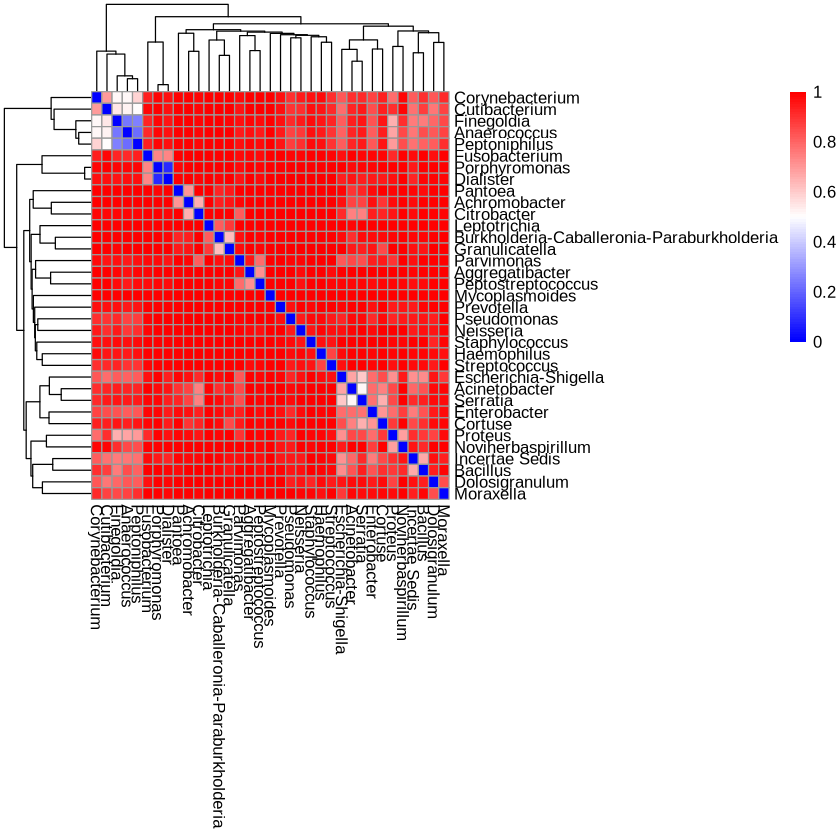

In [8]:
library(pheatmap)

pheatmap(as.matrix(dist_list[["bray"]]),
         clustering_distance_rows = "euclidean",
         clustering_distance_cols = "euclidean",
         color = colorRampPalette(c("blue", "white", "red"))(100))

In [9]:
# Add SNOT category column
metadata_filtered <- metadata_filtered %>%
  mutate(
    SNOT22_cat = case_when(
      SNOT22 < 20 ~ "A",
      SNOT22 >= 21 & SNOT22 <= 40 ~ "B",
      SNOT22 > 40 ~ "C",
      TRUE ~ NA_character_  # keeps NA if SNOT22 is missing
    )
  )

head(metadata_filtered %>% select(ID_Sample, SNOT22, SNOT22_cat))

,ID_Sample,SNOT22,SNOT22_cat
,<chr>,<int>,<chr>
1,0001967K_T1,38,B
2,0001967K_T3,96,C
3,0001967K_T6,79,C
4,0088303G_T0,102,C
5,0088303G_T1,32,B
6,0088303G_T3,NA,NA


In [10]:
library(tidyverse)
library(vegan)
library(pairwiseAdonis)
library(stringr)

# Map samples to timepoints or surgery groups
time_group_map <- c(
  "T0" = "pre_surgery",
  "T1" = "early_post",
  "T3" = "early_post",
  "T6" = "late_post",
  "T12" = "late_post"
)

get_time_group <- function(id_sample) {
  tp <- str_extract(id_sample, "T[0-9]+")
  time_group_map[tp]
}

# 1) Merge all abundance files
abund_files <- list.files(path = "./", pattern = "Abund_by_Timepoint_4_Corr_.*\\.tsv$", 
                          full.names = TRUE)
abund_list <- lapply(abund_files, function(f) {
  df <- read.delim(f, check.names = FALSE, row.names = 1)
  df[is.na(df)] <- 0
  df %>% rownames_to_column(var = "ID_Sample")
})
all_abund <- bind_rows(abund_list)

# 2) Merge with metadata
merged_df <- all_abund %>%
  left_join(metadata_filtered %>% select(ID_Sample, SNOT22_cat), by = "ID_Sample") %>%
  filter(!is.na(SNOT22_cat))

# 3) Add surgery/time groups
merged_df$SurgeryGroup <- sapply(merged_df$ID_Sample, get_time_group)

# 4) Extract genus abundance matrix
genus_data <- merged_df %>% select(-ID_Sample, -SNOT22_cat, -SurgeryGroup)

# Replace NA with 0
genus_data <- genus_data %>% mutate(across(everything(), ~ ifelse(is.na(.), 0, .)))

# 5) Compute Bray-Curtis distance
bc_dist <- vegdist(genus_data, method = "bray")

# 6) Run PERMANOVA across time (or surgery group) + clinic control
permanova_result1 <- adonis2(bc_dist ~ SurgeryGroup + SNOT22_cat, data = merged_df, permutations = 999)

## across time
permanova_result2 <- adonis2(bc_dist ~ SurgeryGroup, data = merged_df, permutations = 999)

# 7) Optionally run pairwise comparisons for SurgeryGroup
pairwise_result <- pairwise.adonis(genus_data, factors = merged_df$SurgeryGroup, sim.method = "bray", p.adjust.m = "bonferroni")

# 8) Inspect results
permanova_result1
permanova_result2
pairwise_result

,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Model,4,1.976293,0.05339085,2.002279,0.004
Residual,142,35.039273,0.94660915,NA,NA
Total,146,37.015566,1.00000000,NA,NA


,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Model,2,1.273836,0.03441351,2.566081,0.007
Residual,144,35.741730,0.96558649,NA,NA
Total,146,37.015566,1.00000000,NA,NA


pairs,Df,SumsOfSqs,F.Model,R2,p.value,p.adjusted,sig
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
pre_surgery vs early_post,1,1.0795118,4.2814391,0.04145410,0.003,0.009,*
pre_surgery vs late_post,1,0.2336808,0.8820017,0.01077162,0.495,1.000,
early_post vs late_post,1,0.5347967,2.3046618,0.02089360,0.033,0.099,


In [11]:
print(head(plot_df))

ERROR: Error: object 'plot_df' not found


In [12]:
# Ensure SurgeryGroup is a factor with correct levels
merged_df$SurgeryGroup <- factor(merged_df$SurgeryGroup, 
                                 levels = c("pre_surgery", "early_post", "late_post"))

# Compute Bray-Curtis distance matrix
bc_dist <- vegdist(genus_data, method = "bray")

# Extract distances to pre-surgery samples
pre_idx <- merged_df$SurgeryGroup == "pre_surgery"

# Compute centroid of pre-surgery group
pre_centroid <- colMeans(as.matrix(genus_data[pre_idx, ]))

# Function to compute Bray-Curtis distance to centroid
bray_to_centroid <- function(x, centroid) {
  sum(abs(x - centroid)) / sum(x + centroid)
}

# Apply to all samples
dist_to_pre <- apply(genus_data, 1, bray_to_centroid, centroid = pre_centroid)

# Add to metadata
plot_df <- merged_df %>%
  mutate(DistanceToPre = dist_to_pre)

# Plot
a <- ggplot(plot_df, aes(x = SurgeryGroup, y = DistanceToPre, fill = SNOT22_cat)) +
  geom_boxplot(outlier.shape = 21, alpha = 0.7) +
  geom_jitter(width = 0.2, size = 2, alpha = 0.6) +
  theme_bw() +
  labs(
    title = "Distance to Pre-Surgery Microbiota",
    x = "Surgery Group",
    y = "Bray-Curtis Distance to Pre-Surgery",
    fill = "SNOT22"
  ) +
  scale_fill_manual(
    values = c(
      "A" = "#e41a1c",   # red
      "B" = "#377eb8",   # blue
      "C" = "#4daf4a"    # green
    ),
    labels = c(
      "A" = "< 20",
      "B" = "21-40",
      "C" = "> 40"
    )
  ) +
  ylim(0.15, 1.25) +
  theme(
    plot.title   = element_text(face = "bold", size = 14),
    axis.title.x = element_text(face = "bold", size = 12),
    axis.title.y = element_text(face = "bold", size = 12),
    axis.text.x  = element_text(face = "bold", size = 10),
    axis.text.y  = element_text(face = "bold", size = 10),
    legend.title = element_text(face = "bold", size = 12),
    legend.text  = element_text(face = "bold", size = 10)
  )

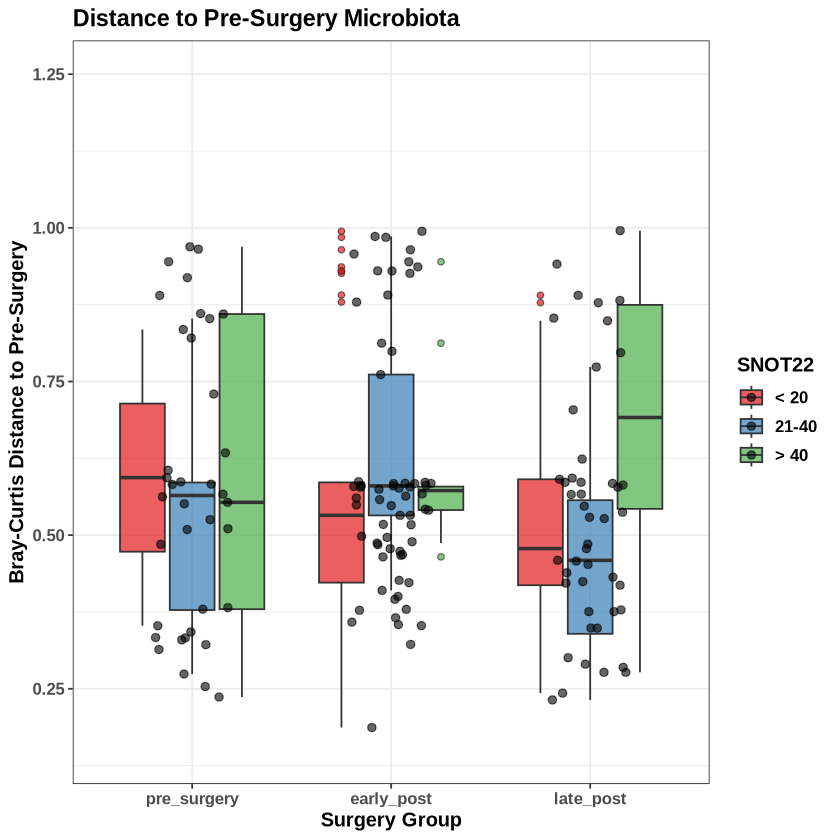

In [13]:
a

In [55]:
ggsave("microbiota_BCdist_presurgery_sig.png", plot = a, width = 10, height = 12, dpi = 300)

In [14]:
library(tidyverse)
library(FSA)        # for dunnTest
library(rstatix)    # for kruskal_test, pairwise comparisons
library(stringr)

# # 1) Build combined grouping variable

# plot_df <- plot_df %>%
#   mutate(Group = paste(SNOT22_cat, SurgeryGroup, sep = "_"))

# print(head(plot_df))

# 2) Prepare genus-only abundance matrix
genus_data <- plot_df %>%
  select(-ID_Sample, -SNOT22_cat, -SurgeryGroup, -DistanceToPre)
# print(head(genus_data))
genus_data <- genus_data %>% mutate(across(everything(), ~ ifelse(is.na(.), 0, .))) # REPLACE NA with 0

# 3) Run Kruskal–Wallis per genus
kruskal_results_time <- genus_data %>%
  pivot_longer(cols = everything(), names_to = "Genus", values_to = "Abundance") %>%
  bind_cols(SurgeryGroup = rep(plot_df$SurgeryGroup, times = ncol(genus_data))) %>%
  group_by(Genus) %>%
  kruskal_test(Abundance ~ SurgeryGroup) %>%
  arrange(p)   # sort by smallest p-value

# kruskal_results_time

# # 4) Filter significant genera (p < 0.05)
# sig_genera <- kruskal_results %>% filter(p < 0.05)
# sig_genera

# # 5) Post-hoc Dunn’s test on significant genera
# dunn_results <- list()

# for(g in sig_genera$Genus) {
#   d <- plot_df %>%
#     select(Group, all_of(g)) %>%
#     rename(Abundance = all_of(g))
  
#   dunn_results[[g]] <- dunnTest(Abundance ~ Group, data = d, method = "bonferroni")$res
# }
# dunn_results

bc_dist <- vegdist(genus_data, method = "bray")

# PERMANOVA across surgery timepoints
permanova_time <- adonis2(
  bc_dist ~ SurgeryGroup,
  data = merged_df,   # must have SurgeryGroup column
  permutations = 999, # number of permutations
  by = "margin"       # gives marginal effects
)

print(permanova_time)

pairwise_permanova <- pairwise.adonis(
  x = genus_data,                  # abundance matrix
  factors = merged_df$SurgeryGroup, # factor defining groups
  sim.method = "bray",             # Bray-Curtis distance
  p.adjust.m = "bonferroni"        # adjust p-values for multiple comparisons
)

# Inspect results
pairwise_permanova


Attaching package: ‘rstatix’


The following object is masked from ‘package:stats’:

    filter




Permutation test for adonis under reduced model
Marginal effects of terms
Permutation: free
Number of permutations: 999

adonis2(formula = bc_dist ~ SurgeryGroup, data = merged_df, permutations = 999, by = "margin")
              Df SumOfSqs      R2      F Pr(>F)   
SurgeryGroup   2    1.274 0.03441 2.5661  0.008 **
Residual     144   35.742 0.96559                 
Total        146   37.016 1.00000                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


pairs,Df,SumsOfSqs,F.Model,R2,p.value,p.adjusted,sig
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
pre_surgery vs early_post,1,1.0795118,4.2814391,0.04145410,0.002,0.006,*
pre_surgery vs late_post,1,0.2336808,0.8820017,0.01077162,0.484,1.000,
early_post vs late_post,1,0.5347967,2.3046618,0.02089360,0.043,0.129,


In [15]:
# Compare surgery group globally (subgroups across each group)
# 1) Build combined grouping variable
plot_df <- plot_df %>%
  mutate(SubGroup = paste(SNOT22_cat, SurgeryGroup, sep = "_"))

# 2) Genus-only abundance matrix (samples as rows, genera as columns)
genus_data <- plot_df %>%
  select(-ID_Sample, -SNOT22_cat, -SurgeryGroup, -DistanceToPre, -SubGroup) %>%
  mutate(across(everything(), ~ ifelse(is.na(.), 0, .)))

# 3) Distance matrix
bc_dist <- vegdist(genus_data, method = "bray")

# 4) PERMANOVA on SubGroup
permanova_subgroups <- adonis2(
  bc_dist ~ SubGroup,
  data = plot_df,
  permutations = 999,
  by = "margin"
)

# 5) Pairwise PERMANOVA between subgroups
pairwise_subgroups <- pairwise.adonis(
  x = genus_data,
  factors = plot_df$SubGroup,
  sim.method = "bray",
  p.adjust.m = "bonferroni"
)
print(permanova_subgroups)

pairwise_subgroups_sorted <- pairwise_subgroups %>%
  arrange(p.value) %>%
  select(pairs, p.value, p.adjusted)

print(pairwise_subgroups_sorted)

Permutation test for adonis under reduced model
Marginal effects of terms
Permutation: free
Number of permutations: 999

adonis2(formula = bc_dist ~ SubGroup, data = plot_df, permutations = 999, by = "margin")
          Df SumOfSqs      R2      F Pr(>F)  
SubGroup   8    2.794 0.07549 1.4085  0.065 .
Residual 138   34.221 0.92451                
Total    146   37.016 1.00000                
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
                            pairs p.value p.adjusted
1   C_pre_surgery vs A_early_post   0.027      0.972
2   C_pre_surgery vs B_early_post   0.030      1.000
3   C_pre_surgery vs C_early_post   0.042      1.000
4     C_early_post vs A_late_post   0.045      1.000
5      C_late_post vs B_late_post   0.063      1.000
6     A_early_post vs A_late_post   0.072      1.000
7   B_pre_surgery vs C_early_post   0.077      1.000
8      A_late_post vs C_late_post   0.084      1.000
9   A_pre_surgery vs C_early_post   0.090      1.000
10    B_e

Warning message:
“The following aesthetics were dropped during statistical transformation: shape.
ℹ This can happen when ggplot fails to infer the correct grouping structure in the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical variable into a factor?”


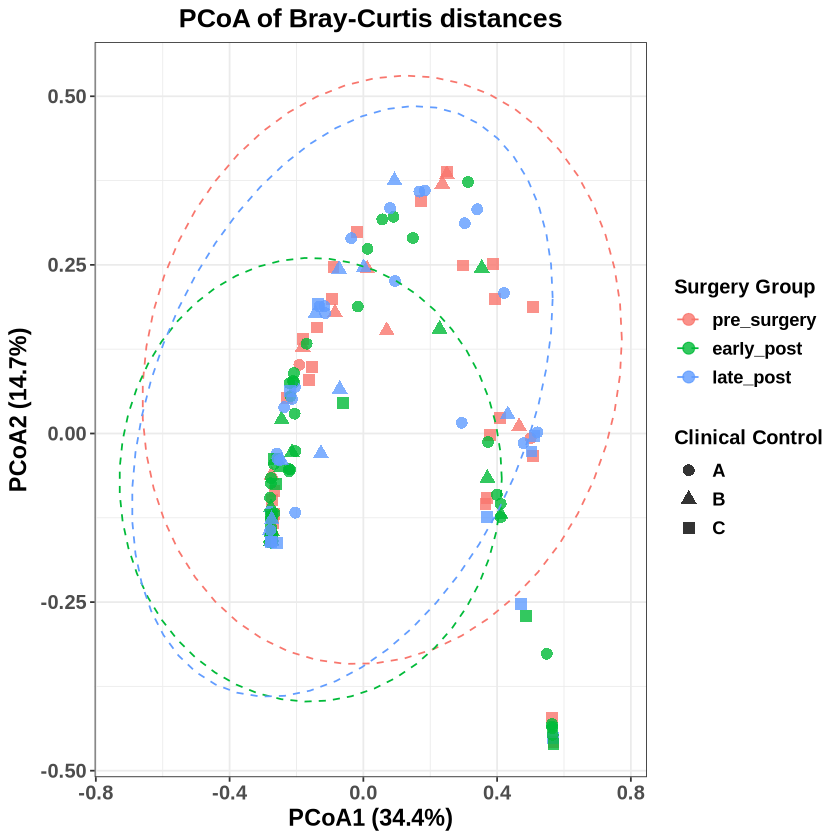

In [16]:
# Perform PCoA
pcoa_res <- cmdscale(bc_dist, eig = TRUE, k = 2)  # 2D

# Compute proportion of variance explained
eig_vals <- pcoa_res$eig
var_explained <- round(100 * eig_vals[1:2] / sum(eig_vals[eig_vals > 0]), 1)

# Create PCoA data frame
pcoa_df <- as.data.frame(pcoa_res$points)
colnames(pcoa_df) <- c("PCoA1", "PCoA2")

# Add metadata
pcoa_df$SurgeryGroup <- merged_df$SurgeryGroup
pcoa_df$SNOT22_cat <- merged_df$SNOT22_cat

# Plot with variance explained in axis labels
pcoa_plot_combined <- ggplot(pcoa_df, aes(x = PCoA1, y = PCoA2, 
                                          color = SurgeryGroup, shape = SNOT22_cat)) +
  geom_point(size = 3, alpha = 0.8) +
  stat_ellipse(aes(group = SurgeryGroup), type = "t", linetype = 2) +
  theme_bw() +
  theme(
    plot.title = element_text(face = "bold", size = 16, hjust = 0.5),
    axis.title = element_text(face = "bold", size = 14),
    axis.text = element_text(face = "bold", size = 12),
    legend.title = element_text(face = "bold", size = 12),
    legend.text = element_text(face = "bold", size = 11)
  ) +
  labs(
    title = "PCoA of Bray-Curtis distances",
    x = paste0("PCoA1 (", var_explained[1], "%)"),
    y = paste0("PCoA2 (", var_explained[2], "%)"),
    color = "Surgery Group",
    shape = "Clinical Control"
  )

# Display
pcoa_plot_combined

Too few points to calculate an ellipse
Warning message:
“Removed 1 row containing missing values or values outside the scale range (`geom_path()`).”


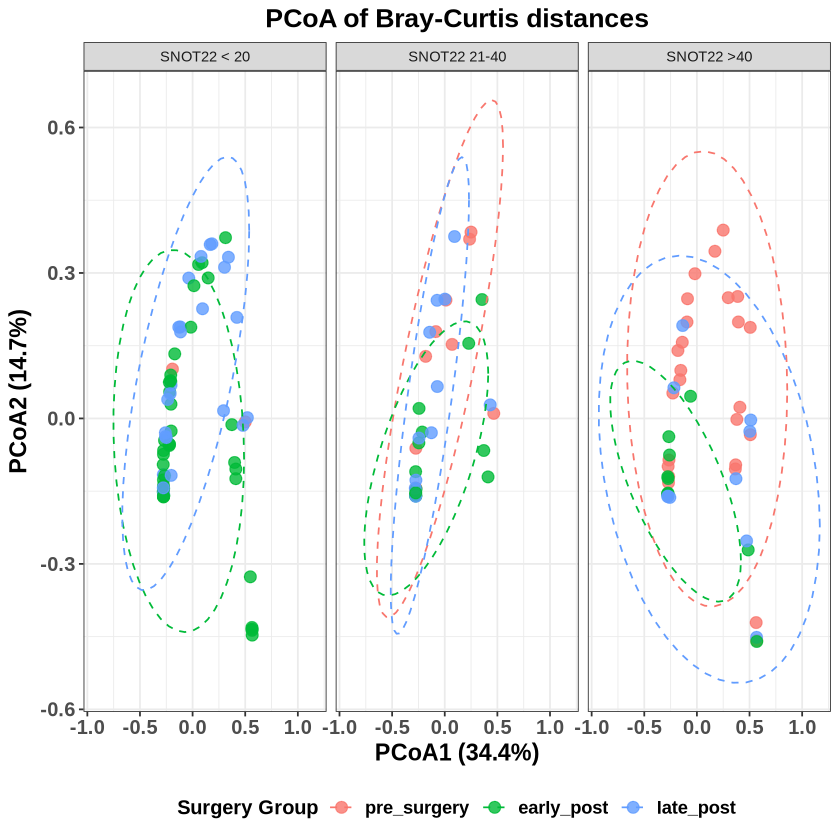

In [17]:
pcoa_df$SNOT22_cat <- factor(
  pcoa_df$SNOT22_cat,
  levels = c("A", "B", "C"),  # current codes
  labels = c("SNOT22 < 20", "SNOT22 21-40", "SNOT22 >40")  # what you want to show
)

a <- ggplot(pcoa_df, aes(x = PCoA1, y = PCoA2, color = SurgeryGroup)) +
  geom_point(size = 3, alpha = 0.8) +
  stat_ellipse(aes(group = SurgeryGroup), type = "t", linetype = 2) +
  theme_bw() +
  theme(
    plot.title = element_text(face = "bold", size = 16, hjust = 0.5),
    axis.title = element_text(face = "bold", size = 14),
    axis.text = element_text(face = "bold", size = 12),
    legend.title = element_text(face = "bold", size = 12),
    legend.text = element_text(face = "bold", size = 11)) + 
  facet_wrap(~ SNOT22_cat) +  # Separate plot for each SNOT22 category
  theme(legend.position = "bottom") +
labs(title = "PCoA of Bray-Curtis distances",
       x = paste0("PCoA1 (", var_explained[1], "%)"),
       y = paste0("PCoA2 (", var_explained[2], "%)"),
       color = "Surgery Group")


a

In [85]:
# Save
ggsave("PCoA_BrayCurtis_Combined_Bold.png", plot = a,
       width = 10, height = 6, dpi = 300)

Too few points to calculate an ellipse
Warning message:
“Removed 1 row containing missing values or values outside the scale range (`geom_path()`).”


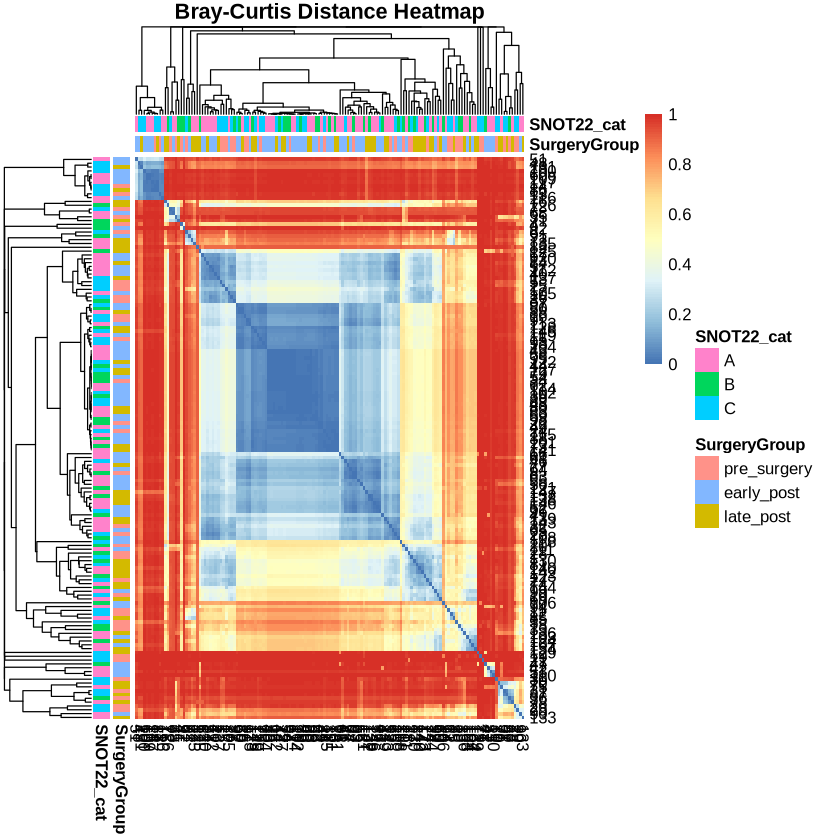

In [18]:
library(pheatmap)

# Distance matrix to heatmap
pheatmap(as.matrix(bc_dist),
         annotation_row = merged_df[, c("SurgeryGroup", "SNOT22_cat")],
         annotation_col = merged_df[, c("SurgeryGroup", "SNOT22_cat")],
         clustering_distance_rows = bc_dist,
         clustering_distance_cols = bc_dist,
         main = "Bray-Curtis Distance Heatmap")


In [19]:
# ---- Load and merge all abundance tables ----
abund_files <- list.files(
  path = "./",
  pattern = "Abund_by_Timepoint_4_Corr_.*\\.tsv$",
  full.names = TRUE
)

# Read and append source files
abund_df <- abund_files %>%
  lapply(function(file_path) {
    df <- read.delim(file_path, check.names = FALSE, row.names = 1) %>%
      rownames_to_column(var = "ID_Sample")
    df
  }) %>%
  bind_rows()
print(head(abund_df))

    ID_Sample Anaerococcus Corynebacterium Cutibacterium Dolosigranulum
1 0088303G_T0    0.6011422       5.6807935     0.1502855    14.93838293
2 0110059G_T0   11.0485269       0.5199307     5.8925477     6.15251300
3 0130765A_T0   10.6796117       0.8252427     1.1650485     0.04854369
4 0207720E_T0    0.7651841       0.0000000     0.1912960     0.11956002
5 0236549G_T0    0.7183908      25.6465517     0.8620690     2.51436782
6 0313863D_T0    0.3693592       1.1883732     0.1927092    91.77774209
  Finegoldia Haemophilus Incertae Sedis Peptoniphilus Porphyromonas Pseudomonas
1 0.81154193   0.1803427      1.1722272     0.7213706    0.12022843  0.06011422
2 5.63258232   2.7296360      0.4766031    21.4904679    0.04332756  3.46620451
3 5.82524272   1.7961165      1.2621359    10.7766990    0.00000000 14.70873786
4 0.07173601   0.0000000      0.1195600     0.2869440    0.00000000  0.52606408
5 0.14367816   0.0000000      0.1436782     0.4310345    0.00000000  5.45977011
6 0.06423639   0

In [20]:
# merge with metadata
abund_meta <- merged_df %>%
  select(ID_Sample, SurgeryGroup, SNOT22_cat) %>%
  left_join(abund_df, by = "ID_Sample")
print(head(abund_meta))

    ID_Sample SurgeryGroup SNOT22_cat Anaerococcus Corynebacterium
1 0088303G_T0  pre_surgery          C    0.6011422       5.6807935
2 0110059G_T0  pre_surgery          C   11.0485269       0.5199307
3 0130765A_T0  pre_surgery          C   10.6796117       0.8252427
4 0207720E_T0  pre_surgery          B    0.7651841       0.0000000
5 0236549G_T0  pre_surgery          C    0.7183908      25.6465517
6 0313863D_T0  pre_surgery          C    0.3693592       1.1883732
  Cutibacterium Dolosigranulum Finegoldia Haemophilus Incertae Sedis
1     0.1502855    14.93838293 0.81154193   0.1803427      1.1722272
2     5.8925477     6.15251300 5.63258232   2.7296360      0.4766031
3     1.1650485     0.04854369 5.82524272   1.7961165      1.2621359
4     0.1912960     0.11956002 0.07173601   0.0000000      0.1195600
5     0.8620690     2.51436782 0.14367816   0.0000000      0.1436782
6     0.1927092    91.77774209 0.06423639   0.0160591      0.1124137
  Peptoniphilus Porphyromonas Pseudomonas Staphy

In [21]:
library(dplyr)
library(tidyr)
library(FSA)  # for dunnTest

# Map timepoints to SurgeryGroup
time_group_map <- c(
  "T0" = "pre_surgery",
  "T1" = "early_post",
  "T3" = "early_post",
  "T6" = "late_post",
  "T12" = "late_post"
)

run_kw_dunn_grouped_filtered <- function(file_path, metadata_df, time_group_map, kw_threshold = 0.05) {
  
  # Load abundance table and reshape to long format
  abund_df <- read.delim(file_path, check.names = FALSE, row.names = 1) %>%
    rownames_to_column("ID_Sample") %>%
    pivot_longer(-ID_Sample, names_to = "Genus", values_to = "RelAbundance")
  
  # Merge with metadata
  df <- abund_df %>%
    left_join(metadata_df %>% select(ID_Sample, SNOT22_cat, SurgeryGroup), by = "ID_Sample") %>%
    filter(!is.na(SNOT22_cat))
  
  # Infer SurgeryGroup from Timepoint if missing
  df <- df %>%
    mutate(
      Timepoint = gsub(".*_T([0-9]+)$", "T\\1", ID_Sample),
      SurgeryGroup = ifelse(is.na(SurgeryGroup), time_group_map[Timepoint], SurgeryGroup),
      Group = paste(SurgeryGroup, SNOT22_cat, sep = "_")
    )
  
  # Kruskal-Wallis per genus
  kw_results <- df %>%
    group_by(Genus) %>%
    summarise(
      p_kw = kruskal.test(RelAbundance ~ Group)$p.value,
      .groups = "drop"
    ) %>%
    mutate(p_adjusted = p.adjust(p_kw, method = "BH")) %>%
    arrange(p_adjusted)
  
  # Filter genera for Dunn's test based on threshold
  genera_to_test <- kw_results %>%
    filter(p_adjusted <= kw_threshold) %>%
    pull(Genus)
  
  if(length(genera_to_test) == 0) {
    dunn_results <- data.frame()  # Return empty if no genus passes threshold
  } else {
    dunn_results <- df %>%
      filter(Genus %in% genera_to_test) %>%
      group_by(Genus) %>%
      do({
        dunnTest(RelAbundance ~ Group, data = ., method = "bonferroni")$res
      }) %>%
      ungroup() %>%
      arrange(Genus, P.adj)
  }
  
  # Return results
  list(
    Timepoint = basename(file_path),
    KW = kw_results,
    Dunn = dunn_results
  )
}

# Apply across all abundance files
kw_dunn_results_grouped_filtered <- lapply(abund_files, run_kw_dunn_grouped_filtered,
                                           metadata_df = merged_df,
                                           time_group_map = time_group_map,
                                           kw_threshold = 0.05)

# Assign timepoint names
names(kw_dunn_results_grouped_filtered) <- gsub(".*Abund_by_Timepoint_4_Corr_(T[0-9]+)\\.tsv$", "\\1", abund_files)

In [22]:
library(dplyr)
library(tidyr)
library(FSA)  # for dunnTest

# Function: KW + Dunn on combined groups
run_kw_dunn_grouped_combined <- function(abund_files, metadata_df, time_group_map, kw_threshold = 0.05) {
  
  # Merge all abundance tables
  abund_df <- lapply(abund_files, function(f) {
    read.delim(f, check.names = FALSE, row.names = 1) %>%
      rownames_to_column("ID_Sample") %>%
      pivot_longer(-ID_Sample, names_to = "Genus", values_to = "RelAbundance") %>%
      mutate(Timepoint = gsub(".*_T([0-9]+)$", "T\\1", ID_Sample))
  }) %>% bind_rows()
  
  # Merge with metadata and create combined factor
  df <- abund_df %>%
    left_join(metadata_df %>% select(ID_Sample, SNOT22_cat, SurgeryGroup), by = "ID_Sample") %>%
    mutate(
      SurgeryGroup = ifelse(is.na(SurgeryGroup), time_group_map[Timepoint], SurgeryGroup),
      Group = paste(SurgeryGroup, SNOT22_cat, sep = "_")
    ) %>%
    filter(!is.na(SNOT22_cat))
  
  # Kruskal-Wallis per genus
  kw_results <- df %>%
    group_by(Genus) %>%
    summarise(
      p_kw = kruskal.test(RelAbundance ~ Group)$p.value,
      .groups = "drop"
    ) %>%
    mutate(p_adjusted = p.adjust(p_kw, method = "BH")) %>%
    arrange(p_adjusted)
  
  # Select only genera with significant KW p_adj
  sig_genera <- kw_results %>% filter(p_adjusted <= kw_threshold) %>% pull(Genus)
  
  if(length(sig_genera) == 0){
    dunn_results <- data.frame()
    message("No genera passed the KW adjusted p-value threshold.")
  } else {
    # Dunn's test only on significant genera
    dunn_results <- df %>%
      filter(Genus %in% sig_genera) %>%
      group_by(Genus) %>%
      do({
        dunnTest(RelAbundance ~ Group, data = ., method = "bonferroni")$res
      }) %>%
      ungroup() %>%
      arrange(Genus, P.adj)
  }
  
  # Return only significant results for printing
  list(
    KW_significant = kw_results %>% filter(p_adjusted <= kw_threshold),
    Dunn = dunn_results
  )
}

# Run function
kw_dunn_results_combined <- run_kw_dunn_grouped_combined(
  abund_files = abund_files,
  metadata_df = merged_df,
  time_group_map = time_group_map,
  kw_threshold = 0.05
)

# Print only significant KW results
print(kw_dunn_results_combined$KW_significant)

# Print Dunn results (only for significant genera)
sig_dunn <- kw_dunn_results_combined$Dunn %>%
  filter(P.adj <= 0.05)

print(sig_dunn)

Warning message:
“Group was coerced to a factor.”
Warning message:
“Group was coerced to a factor.”
Warning message:
“Group was coerced to a factor.”
Warning message:
“Group was coerced to a factor.”
Warning message:
“Group was coerced to a factor.”
Warning message:
“Group was coerced to a factor.”


# A tibble: 6 × 3
  Genus                  p_kw p_adjusted
  <chr>                 <dbl>      <dbl>
1 Dolosigranulum     0.000125    0.00424
2 Peptostreptococcus 0.000550    0.00468
3 Porphyromonas      0.000452    0.00468
4 Streptococcus      0.000474    0.00468
5 Peptoniphilus      0.00344     0.0234 
6 Anaerococcus       0.00767     0.0435 
# A tibble: 20 × 5
   Genus              Comparison     Z     P.unadj     P.adj
   <chr>              <chr>      <dbl>       <dbl>     <dbl>
 1 Dolosigranulum     1_C - 2_A   4.13 0.0000361   0.00130  
 2 Dolosigranulum     1_C - 2_C   3.53 0.000423    0.0152   
 3 Peptoniphilus      1_C - 3_C   3.29 0.00102     0.0367   
 4 Peptoniphilus      1_B - 3_C   3.28 0.00104     0.0376   
 5 Peptostreptococcus 1_A - 2_B   4.98 0.000000630 0.0000227
 6 Peptostreptococcus 1_A - 3_A   4.96 0.000000722 0.0000260
 7 Peptostreptococcus 1_A - 2_C   4.88 0.00000103  0.0000373
 8 Peptostreptococcus 1_A - 2_A   4.86 0.00000116  0.0000418
 9 Peptostreptococcus 1_A

In [23]:
library(dplyr)
library(tidyr)
library(FSA)  # for dunnTest

run_kw_dunn_by_surgery <- function(abund_files, metadata_df, time_group_map, kw_threshold = 0.05) {
  
  # Merge all abundance tables
  abund_df <- lapply(abund_files, function(f) {
    read.delim(f, check.names = FALSE, row.names = 1) %>%
      rownames_to_column("ID_Sample") %>%
      pivot_longer(-ID_Sample, names_to = "Genus", values_to = "RelAbundance") %>%
      mutate(Timepoint = gsub(".*_T([0-9]+)$", "T\\1", ID_Sample))
  }) %>% bind_rows()
  
  # Merge with metadata and assign SurgeryGroup
  df <- abund_df %>%
    left_join(metadata_df %>% select(ID_Sample, SNOT22_cat, SurgeryGroup), by = "ID_Sample") %>%
    mutate(
      SurgeryGroup = ifelse(is.na(SurgeryGroup), time_group_map[Timepoint], SurgeryGroup)
    ) %>%
    filter(!is.na(SNOT22_cat))
  
  # Initialize lists to store results
  kw_results_list <- list()
  dunn_results_list <- list()
  
  # Loop over each SurgeryGroup
  for(group in unique(df$SurgeryGroup)) {
    df_sub <- df %>% filter(SurgeryGroup == group)
    
    # KW per genus within this SurgeryGroup
    kw_res <- df_sub %>%
      group_by(Genus) %>%
      summarise(
        p_kw = kruskal.test(RelAbundance ~ SNOT22_cat)$p.value,
        .groups = "drop"
      ) %>%
      mutate(p_adjusted = p.adjust(p_kw, method = "BH")) %>%
      arrange(p_adjusted)
    
    kw_results_list[[group]] <- kw_res
    
    # Dunn only for significant genera
    sig_genera <- kw_res %>% filter(p_adjusted <= kw_threshold) %>% pull(Genus)
    
    if(length(sig_genera) > 0) {
      dunn_res <- df_sub %>%
        filter(Genus %in% sig_genera) %>%
        group_by(Genus) %>%
        do({
          dunnTest(RelAbundance ~ SNOT22_cat, data = ., method = "bonferroni")$res
        }) %>%
        ungroup() %>%
        arrange(Genus, P.adj)
    } else {
      dunn_res <- data.frame()
    }
    
    dunn_results_list[[group]] <- dunn_res
  }
  
  list(
    KW_by_SurgeryGroup = kw_results_list,
    Dunn_by_SurgeryGroup = dunn_results_list
  )
}

# Run the function
kw_dunn_results_by_surgery <- run_kw_dunn_by_surgery(
  abund_files = abund_files,
  metadata_df = merged_df,
  time_group_map = time_group_map,
  kw_threshold = 0.05
)

# Example: inspect KW results for pre_surgery
head(kw_dunn_results_by_surgery$KW_by_SurgeryGroup$pre_surgery)

# Example: inspect Dunn results for pre_surgery
kw_dunn_results_by_surgery$Dunn_by_SurgeryGroup$pre_surgery


NULL

NULL

In [24]:
# Example: inspect KW results for other surgical time points
kw_dunn_results_by_surgery$KW_by_SurgeryGroup$late_post

kw_dunn_results_by_surgery$Dunn_by_SurgeryGroup$late_post

kw_dunn_results_by_surgery$KW_by_SurgeryGroup$

kw_dunn_results_by_surgery$Dunn_by_SurgeryGroup$late_post


NULL

NULL

NULL

In [25]:
# Use only significant genera from KW test
sig_genera <- kw_dunn_results_combined$KW_significant$Genus

# Prepare abundance data for plotting
abund_combined <- lapply(abund_files, function(f) {
  read.delim(f, check.names = FALSE, row.names = 1) %>%
    rownames_to_column("ID_Sample") %>%
    pivot_longer(-ID_Sample, names_to = "Genus", values_to = "RelAbundance") %>%
    mutate(Timepoint = gsub(".*_T([0-9]+)$", "T\\1", ID_Sample))
}) %>% bind_rows() %>%
  left_join(merged_df %>% select(ID_Sample, SNOT22_cat, SurgeryGroup), by = "ID_Sample") %>%
  mutate(
    SurgeryGroup = ifelse(is.na(SurgeryGroup), time_group_map[Timepoint], SurgeryGroup)
  ) %>%
  filter(Genus %in% sig_genera)

# Assign SNOT22 categories as factors and remove NAs
abund_combined <- abund_combined %>%
  filter(!is.na(SNOT22_cat)) %>%  # remove missing categories
  mutate(
    SNOT22_cat = factor(
      SNOT22_cat,
      levels = c("A", "B", "C"),  # current codes
      labels = c("SNOT22 < 20", "SNOT22 21-40", "SNOT22 >40")  # what you want to show
    )
  )

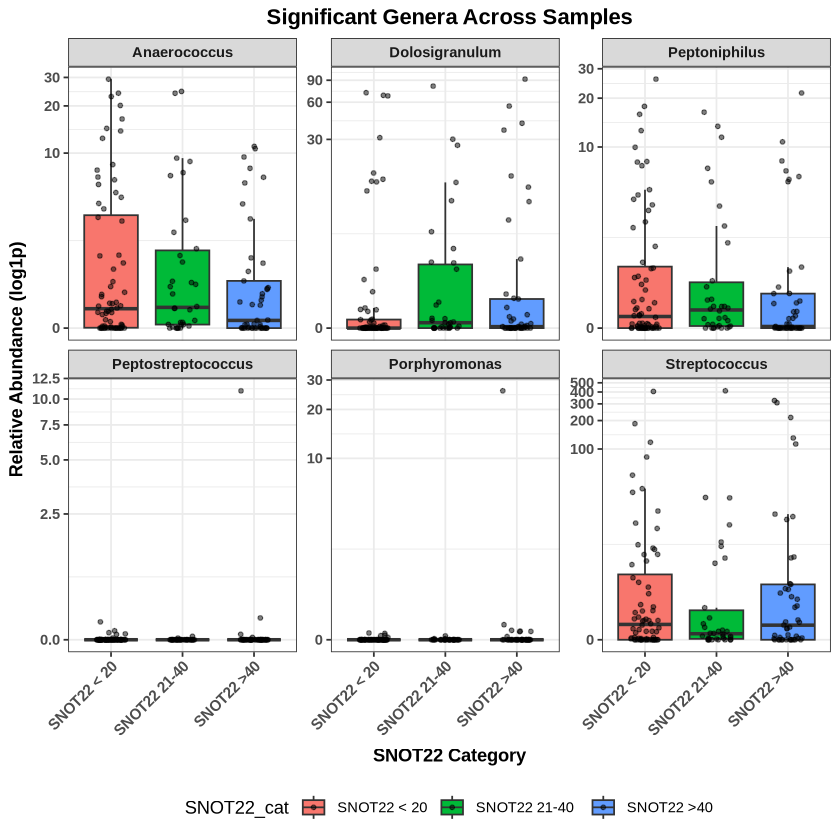

In [26]:
# Plot
p <- ggplot(abund_combined, aes(x = SNOT22_cat, y = RelAbundance, fill = SNOT22_cat)) +
  geom_boxplot(outlier.shape = NA) +
  geom_jitter(width = 0.2, alpha = 0.5, size = 1) +
  facet_wrap(~ Genus, scales = "free_y") +
  scale_y_continuous(trans = "log1p") +  # log(x+1) transformation
  theme_bw() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, face = "bold"),
    axis.text.y = element_text(face = "bold"),
    axis.title = element_text(face = "bold"),
    strip.text = element_text(face = "bold"),
    legend.position = "bottom",
    plot.title = element_text(face = "bold", hjust = 0.5)
  ) +
  labs(
    x = "SNOT22 Category",
    y = "Relative Abundance (log1p)",
    title = "Significant Genera Across Samples"
  )

p

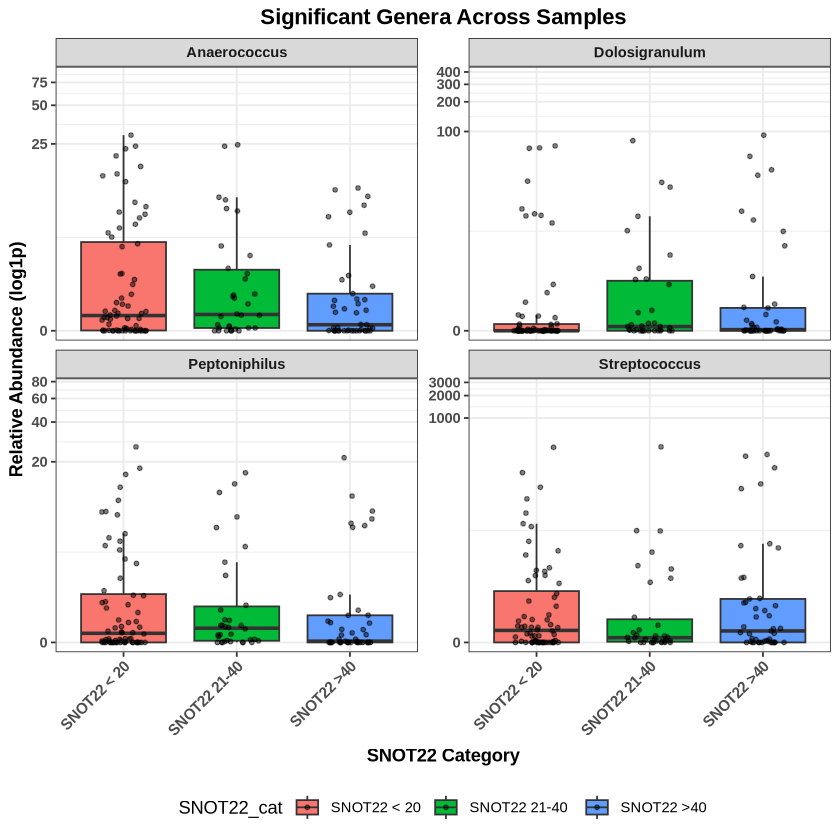

In [27]:
# List of genera to exclude
exclude_genera <- c("Peptostreptococcus", "Porphyromonas")

# Filter dataset
abund_plot <- abund_combined %>%
  filter(!Genus %in% exclude_genera)

# Then plot
p <- ggplot(abund_plot, aes(x = SNOT22_cat, y = RelAbundance, fill = SNOT22_cat)) +
  geom_boxplot(outlier.shape = NA) +
  geom_jitter(width = 0.2, alpha = 0.5, size = 1) +
  facet_wrap(~ Genus, scales = "free_y") +
  scale_y_continuous(trans = "log1p", expand = expansion(mult = c(0.05, 0.35))) +
  theme_bw() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, face = "bold"),
    axis.text.y = element_text(face = "bold"),
    axis.title = element_text(face = "bold"),
    strip.text = element_text(face = "bold"),
    legend.position = "bottom",
    plot.title = element_text(face = "bold", hjust = 0.5)
  ) +
  labs(
    x = "SNOT22 Category",
    y = "Relative Abundance (log1p)",
    title = "Significant Genera Across Samples"
  )

p

In [125]:
ggsave("sigGenera_SNOT22_all_surgical_tps.png", plot = p,
       width = 8, height = 10, dpi = 300)

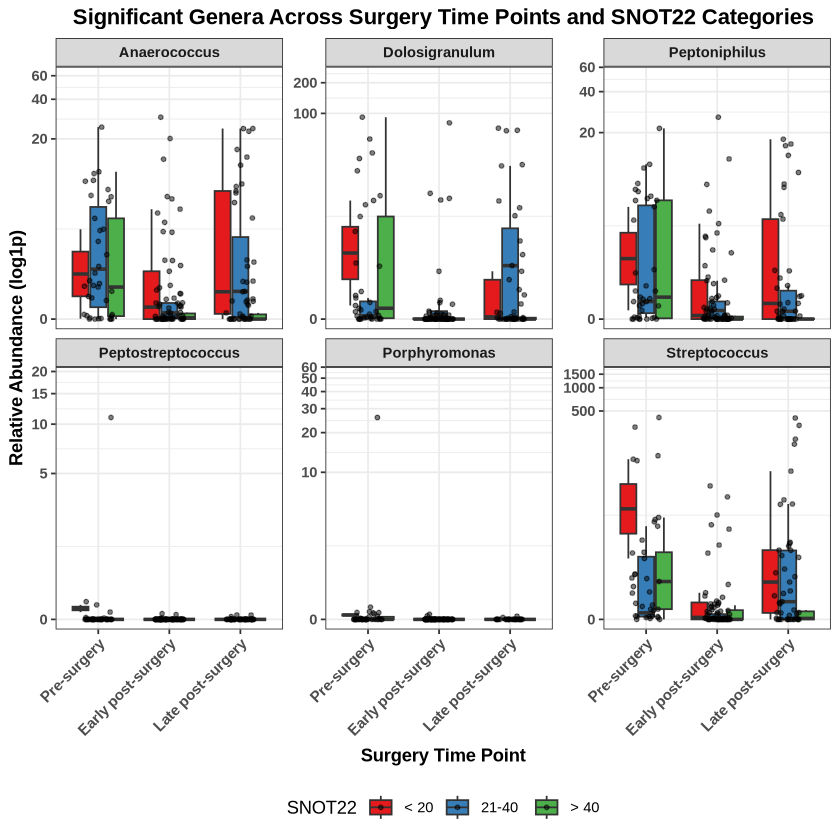

In [28]:
library(ggplot2)
library(dplyr)

# Filter only significant genera
sig_genera <- kw_dunn_results_combined$KW_significant$Genus

abund_plot <- lapply(abund_files, function(f) {
  read.delim(f, check.names = FALSE, row.names = 1) %>%
    rownames_to_column("ID_Sample") %>%
    pivot_longer(-ID_Sample, names_to = "Genus", values_to = "RelAbundance") %>%
    mutate(Timepoint = gsub(".*_T([0-9]+)$", "T\\1", ID_Sample))
}) %>% bind_rows() %>%
  left_join(merged_df %>% select(ID_Sample, SNOT22_cat, SurgeryGroup), by = "ID_Sample") %>%
  mutate(
    SurgeryGroup = factor(
      SurgeryGroup,
      levels = c("pre_surgery", "early_post", "late_post"),
      labels = c("Pre-surgery", "Early post-surgery", "Late post-surgery")
    ),
    SNOT22_cat = factor(
      SNOT22_cat,
      levels = c("A", "B", "C"),
      labels = c("< 20", "21-40", "> 40")
    )
  ) %>%
  filter(Genus %in% sig_genera & !is.na(SNOT22_cat) & !is.na(SurgeryGroup))

# Grouped boxplot
p <- ggplot(abund_plot, aes(x = SurgeryGroup, y = RelAbundance, fill = SNOT22_cat)) +
  geom_boxplot(outlier.shape = NA) +
  geom_jitter(width = 0.2, alpha = 0.5, size = 1) +
  facet_wrap(~ Genus, scales = "free_y") +
  scale_y_continuous(trans = "log1p", expand = expansion(mult = c(0.05, 0.25))) +
  scale_fill_manual(values = c("#e41a1c", "#377eb8", "#4daf4a")) +
  scale_color_manual(values = c("#e41a1c", "#377eb8", "#4daf4a")) +
  theme_bw() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, face = "bold"),
    axis.text.y = element_text(face = "bold"),
    axis.title = element_text(face = "bold"),
    strip.text = element_text(face = "bold"),
    legend.position = "bottom",
    plot.title = element_text(face = "bold", hjust = 0.5)
  ) +
  labs(
    x = "Surgery Time Point",
    y = "Relative Abundance (log1p)",
    fill = "SNOT22",
    color = "SNOT22",
    title = "Significant Genera Across Surgery Time Points and SNOT22 Categories"
  )

p

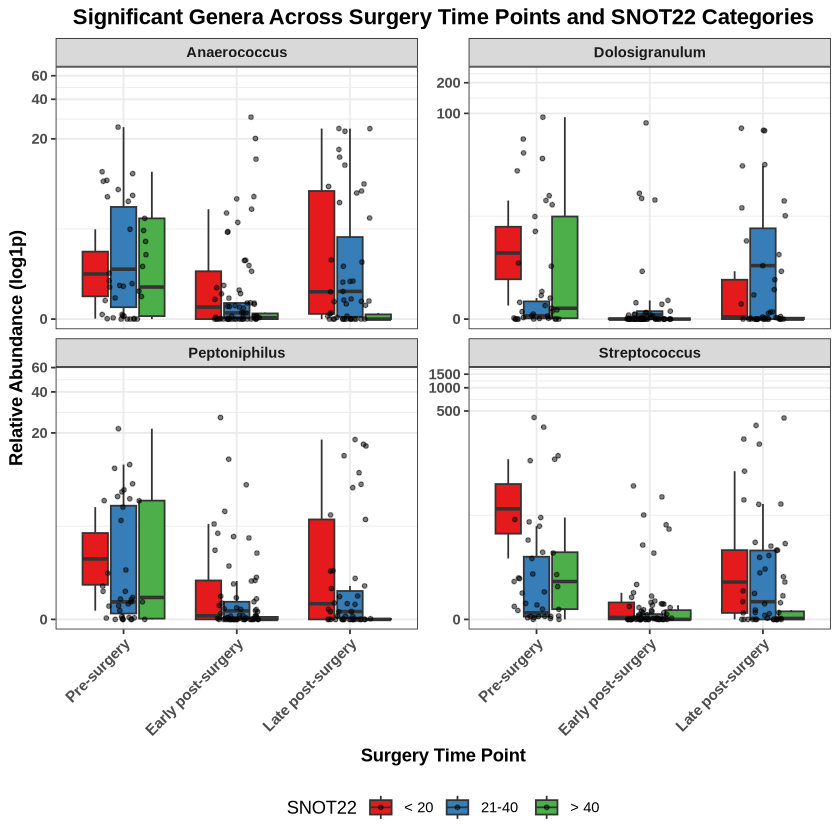

In [29]:
# List of genera to exclude
exclude_genera <- c("Peptostreptococcus", "Porphyromonas")

# Filter dataset to exclude those genera
abund_plot_filtered <- abund_plot %>%
  filter(!Genus %in% exclude_genera)

# Grouped boxplot
p <- ggplot(abund_plot_filtered, aes(x = SurgeryGroup, y = RelAbundance, fill = SNOT22_cat)) +
  geom_boxplot(outlier.shape = NA) +
  geom_jitter(width = 0.2, alpha = 0.5, size = 1) +
  facet_wrap(~ Genus, scales = "free_y") +
  scale_y_continuous(trans = "log1p", expand = expansion(mult = c(0.05, 0.25))) +
  scale_fill_manual(values = c("#e41a1c", "#377eb8", "#4daf4a")) +
  scale_color_manual(values = c("#e41a1c", "#377eb8", "#4daf4a")) +
  theme_bw() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, face = "bold"),
    axis.text.y = element_text(face = "bold"),
    axis.title = element_text(face = "bold"),
    strip.text = element_text(face = "bold"),
    legend.position = "bottom",
    plot.title = element_text(face = "bold", hjust = 0.5)
  ) +
  labs(
    x = "Surgery Time Point",
    y = "Relative Abundance (log1p)",
    fill = "SNOT22",
    color = "SNOT22",
    title = "Significant Genera Across Surgery Time Points and SNOT22 Categories"
  )

p

In [150]:
ggsave("sigGenera_SNOT22_all_surgical_tps.png", plot = p,
       width = 10, height = 10, dpi = 300)

In [30]:
alpha_df <- read.delim("AlhaDiversity_Indexes.tsv", check.names = FALSE)
# Clean sample IDs (remove leading "X" if present)
alpha_df <- alpha_df %>%
  mutate(ID_Sample = gsub("^X", "", ID_Sample))

alpha_merged <- alpha_df %>%
  left_join(merged_df %>% select(ID_Sample, SNOT22_cat, SurgeryGroup), by = "ID_Sample") %>%
  filter(!is.na(SNOT22_cat), !is.na(SurgeryGroup), !is.na(Shannon))
print(head(alpha_merged))

  Observed     Chao1  se.chao1      ACE   se.ACE   Shannon  Simpson InvSimpson
1        5  5.000000 0.2236068  5.70059 1.103161 0.1102647 0.035554   1.036865
2        1  1.000000 0.0000000       NA       NA 0.0000000 0.000000   1.000000
3        1  1.000000 0.0000000       NA       NA 0.0000000 0.000000   1.000000
4        9  9.333333 0.9148009 10.57551 1.525651 0.5201432 0.231824   1.301785
5        1  1.000000 0.0000000       NA       NA 0.0000000 0.000000   1.000000
6       16 16.250000 0.7327750 17.89744 1.898376 1.3340343 0.529392   2.124911
     Fisher   ID_Sample SNOT22_cat SurgeryGroup
1 0.6863709 0001967K_T1          B   early_post
2 0.1096721 0001967K_T3          C   early_post
3 0.1096721 0001967K_T6          C    late_post
4 1.3638955 0088303G_T0          C  pre_surgery
5 0.1096721 0088303G_T1          B   early_post
6 2.7048062 0110059G_T0          C  pre_surgery


In [31]:
# Function: KW + Dunn for Shannon index
run_kw_dunn_shannon <- function(alpha_df, kw_threshold = 0.05) {
  kw_results_list <- list()
  dunn_results_list <- list()
  
  for(group in unique(alpha_df$SurgeryGroup)) {
    df_sub <- alpha_df %>% filter(SurgeryGroup == group)
    
    # KW test on Shannon
    kw_res <- kruskal.test(Shannon ~ SNOT22_cat, data = df_sub)
    kw_results_list[[group]] <- data.frame(
      SurgeryGroup = group,
      KW_p = kw_res$p.value,
      KW_p_adj = p.adjust(kw_res$p.value, method = "BH", n = length(unique(alpha_df$SurgeryGroup)))
    )
    
    # Dunn’s post-hoc if significant
    if(kw_results_list[[group]]$KW_p_adj <= kw_threshold) {
      dunn_res <- dunnTest(Shannon ~ SNOT22_cat, data = df_sub, method = "bonferroni")$res
      dunn_res$SurgeryGroup <- group
    } else {
      dunn_res <- data.frame()
    }
    dunn_results_list[[group]] <- dunn_res
  }
  
  list(
    KW_by_SurgeryGroup = kw_results_list,
    Dunn_by_SurgeryGroup = dunn_results_list
  )
}

In [32]:
kw_dunn_results_shannon <- run_kw_dunn_shannon(alpha_merged, kw_threshold = 0.05)
kw_dunn_results_shannon

Warning message:
“SNOT22_cat was coerced to a factor.”


$KW_by_SurgeryGroup
$KW_by_SurgeryGroup$early_post
  SurgeryGroup      KW_p KW_p_adj
1   early_post 0.4462255        1

$KW_by_SurgeryGroup$late_post
  SurgeryGroup       KW_p   KW_p_adj
1    late_post 0.01301984 0.03905952

$KW_by_SurgeryGroup$pre_surgery
  SurgeryGroup      KW_p KW_p_adj
1  pre_surgery 0.9909071        1


$Dunn_by_SurgeryGroup
$Dunn_by_SurgeryGroup$early_post
data frame with 0 columns and 0 rows

$Dunn_by_SurgeryGroup$late_post
  Comparison         Z    P.unadj      P.adj SurgeryGroup
1      A - B 0.1419127 0.88714894 1.00000000    late_post
2      A - C 2.8537237 0.00432101 0.01296303    late_post
3      B - C 2.3262681 0.02000426 0.06001277    late_post

$Dunn_by_SurgeryGroup$pre_surgery
data frame with 0 columns and 0 rows

In [155]:
# Initialize lists
kw_results_list <- list()
dunn_results_list <- list()

# Global Kruskal–Wallis on Shannon across SurgeryGroups
kw_p <- kruskal.test(Shannon ~ SurgeryGroup, data = alpha_merged)$p.value

kw_res <- data.frame(
  Test = "SurgeryGroup",
  p_kw = kw_p,
  p_adjusted = p.adjust(kw_p, method = "BH")
)

kw_results_list[["SurgeryGroup"]] <- kw_res

# Post-hoc Dunn’s test if KW significant
if(kw_res$p_adjusted <= 0.05) {
  dunn_res <- dunnTest(Shannon ~ SurgeryGroup, data = alpha_merged, method = "bonferroni")$res %>%
    mutate(Test = "SurgeryGroup")
} else {
  dunn_res <- data.frame()
}

dunn_results_list[["SurgeryGroup"]] <- dunn_res

# Collect results
kw_results <- do.call(rbind, kw_results_list)
dunn_results <- do.call(rbind, dunn_results_list)

# Inspect
kw_results
dunn_results


,Test,p_kw,p_adjusted
,<chr>,<dbl>,<dbl>
SurgeryGroup,SurgeryGroup,0.004038943,0.004038943


,Comparison,Z,P.unadj,P.adj,Test
,<chr>,<dbl>,<dbl>,<dbl>,<chr>
SurgeryGroup.1,early_post - late_post,-2.038659,0.041484113,0.124452340,SurgeryGroup
SurgeryGroup.2,early_post - pre_surgery,-3.209440,0.001329937,0.003989811,SurgeryGroup
SurgeryGroup.3,late_post - pre_surgery,-1.217026,0.223594182,0.670782545,SurgeryGroup


Warning message:
“Removed 1 row containing missing values or values outside the scale range (`geom_point()`).”


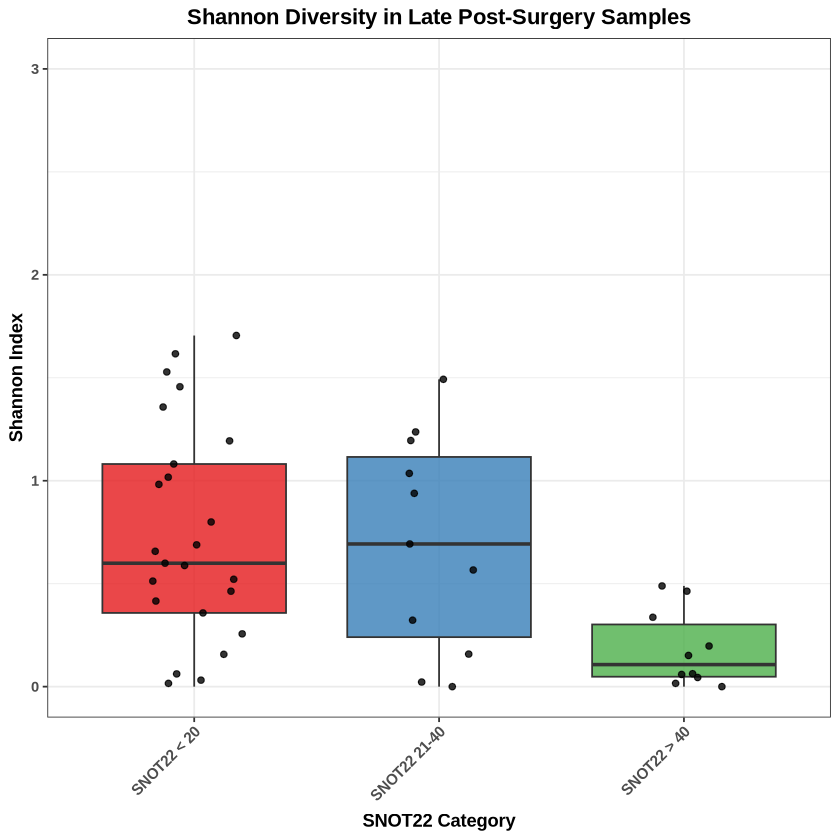

In [33]:
# Filter only late post-surgery samples
alpha_late_post <- alpha_merged %>%
  filter(SurgeryGroup == "late_post")

# Define SNOT22 colors (optional)
snot_colors <- c(
  "SNOT22 < 20"   = "#e41a1c",
  "SNOT22 21-40"  = "#377eb8",
  "SNOT22 > 40"   = "#4daf4a"
)

# Make sure SNOT22_cat is a factor in the right order
alpha_late_post$SNOT22_cat <- factor(
  alpha_late_post$SNOT22_cat,
  levels = c("A", "B", "C"),
  labels = c("SNOT22 < 20", "SNOT22 21-40", "SNOT22 > 40")
)

# Plot Shannon index by SNOT22 category for late post-surgery
plot_shannon_late_post <- ggplot(alpha_late_post, aes(x = SNOT22_cat, y = Shannon, fill = SNOT22_cat)) +
  geom_boxplot(outlier.shape = NA, alpha = 0.8) +
  geom_jitter(width = 0.2, alpha = 0.8, color = "black") +
  scale_fill_manual(values = snot_colors) +
  theme_bw() +
  labs(
    x = "SNOT22 Category",
    y = "Shannon Index",
    title = "Shannon Diversity in Late Post-Surgery Samples"
  ) +
  theme(
    legend.position = "none",
    axis.text.x = element_text(face = "bold", angle = 45, hjust = 1),
    axis.text.y = element_text(face = "bold"),
    axis.title = element_text(face = "bold"),
    plot.title = element_text(face = "bold", hjust = 0.5)
  ) +
  scale_y_continuous(limits = c(0, 3.0))  # adjust limits if needed

# Print the plot
print(plot_shannon_late_post)

In [165]:
ggsave("Shannon_AlphaDiv_Surgery_plot.png", plot = plot_shannon_late_post,
       width = 8, height = 8, dpi = 300)


Warning message:
“Removed 3 rows containing missing values or values outside the scale range (`geom_point()`).”


In [36]:
colnames(metadata_filtered)

[1] "ID_Sample"           "SNOT22"              "SNOT22nasal"        
 [4] "LK_Total"            "LK_Secret"           "ClinicCtrl"         
 [7] "AntUse"              "Cortuse"             "Patient"            
[10] "Filename"            "nreads"              "Timepoint"          
[13] "Sex"                 "Age"                 "Atopic_Symptoms"    
[16] "Asthma"              "NSAID_Intolerance"   "Total_IgE"          
[19] "Blood_Eosinophilia"  "Tissue_Eosinophilia" "Final_LundMackay"   
[22] "SNOT22_cat"

In [38]:
# ---------- Correlation: microbes x SNOT22

# print(head(abund_df_all))

# colnames(metadata_filtered)

##  Merge with metadata 
merged_df <- abund_df_all %>%
  left_join(metadata_filtered %>% select(ID_Sample, SNOT22_cat, SNOT22), by = "ID_Sample") %>%
  filter(!is.na(SNOT22_cat))

# Map samples to timepoints or surgery groups
time_group_map <- c(
  "T0" = "pre_surgery",
  "T1" = "early_post",
  "T3" = "early_post",
  "T6" = "late_post",
  "T12" = "late_post"
)

get_time_group <- function(id_sample) {
  tp <- str_extract(id_sample, "T[0-9]+")
  time_group_map[tp]
}

# Add surgery/time groups
merged_df$SurgeryGroup <- sapply(merged_df$ID_Sample, get_time_group)

# 4) Extract genus abundance matrix
genus_data <- merged_df %>% select(-ID_Sample, -SNOT22_cat, -SurgeryGroup, -SNOT22)

# Replace NA with 0
genus_data <- genus_data %>% mutate(across(everything(), ~ ifelse(is.na(.), 0, .)))
print(head(genus_data))
print(head(merged_df))


  Anaerococcus Corynebacterium Cutibacterium Dolosigranulum Finegoldia
1    0.6011422       5.6807935     0.1502855    14.93838293 0.81154193
2   11.0485269       0.5199307     5.8925477     6.15251300 5.63258232
3   10.6796117       0.8252427     1.1650485     0.04854369 5.82524272
4    0.7651841       0.0000000     0.1912960     0.11956002 0.07173601
5    0.7183908      25.6465517     0.8620690     2.51436782 0.14367816
6    0.3693592       1.1883732     0.1927092    91.77774209 0.06423639
  Haemophilus Incertae Sedis Peptoniphilus Porphyromonas Pseudomonas
1   0.1803427      1.1722272     0.7213706    0.12022843  0.06011422
2   2.7296360      0.4766031    21.4904679    0.04332756  3.46620451
3   1.7961165      1.2621359    10.7766990    0.00000000 14.70873786
4   0.0000000      0.1195600     0.2869440    0.00000000  0.52606408
5   0.0000000      0.1436782     0.4310345    0.00000000  5.45977011
6   0.0160591      0.1124137     0.2408865    0.00000000  0.00000000
  Staphylococcus Str

In [39]:
# ---- Function to compute Spearman correlation for each genus ----
compute_spearman <- function(df) {
  genus_cols <- setdiff(colnames(df), c("ID_Sample", "SNOT22_cat", "SurgeryGroup", "SNOT22"))
  
  results <- lapply(genus_cols, function(genus) {
    x <- df[[genus]]
    y <- df$SNOT22
    
    # Skip if not enough unique values
    if (length(unique(x[!is.na(x)])) < 2 | length(unique(y[!is.na(y)])) < 2) {
      return(NULL)
    }
    
    cor_test <- suppressWarnings(cor.test(x, y, method = "spearman"))
    
    data.frame(
      Genus = genus,
      rho = cor_test$estimate,
      p_value = cor_test$p.value
    )
  })
  
  # Combine results and adjust p-values
  results_df <- bind_rows(results) %>%
    mutate(p_adj = p.adjust(p_value, method = "fdr")) %>%
    arrange(p_value)
  
  return(results_df)
}

overall_corr <- compute_spearman(merged_df)

by_group_corr <- merged_df %>%
  group_split(SurgeryGroup) %>%
  setNames(unique(merged_df$SurgeryGroup)) %>%
  lapply(compute_spearman)

head(overall_corr)
lapply(by_group_corr, head)

,Genus,rho,p_value,p_adj
,<chr>,<dbl>,<dbl>,<dbl>
rho...1,Mycoplasmoides,-0.2585602,0.01097210,0.3730515
rho...2,Serratia,-0.1735557,0.03552974,0.6040057
rho...3,Noviherbaspirillum,0.1763487,0.07771918,0.8259395
rho...4,Aggregatibacter,0.1337237,0.15240522,0.8259395
rho...5,Anaerococcus,-0.1120615,0.17658813,0.8259395
rho...6,Leptotrichia,-0.1266038,0.17950871,0.8259395


,Genus,rho,p_value,p_adj
,<chr>,<dbl>,<dbl>,<dbl>
rho...1,Acinetobacter,-0.2553542,0.04170340,0.3248483
rho...2,Incertae Sedis,-0.2519330,0.04461558,0.3248483
rho...3,Streptococcus,-0.2416812,0.05435841,0.3248483
rho...4,Staphylococcus,0.2365383,0.05986171,0.3248483
rho...5,Finegoldia,-0.2240379,0.07512894,0.3248483
rho...6,Noviherbaspirillum,0.2234065,0.07597556,0.3248483
,Genus,rho,p_value,p_adj
,<chr>,<dbl>,<dbl>,<dbl>
rho...1,Dialister,-0.4181090,0.003834610,0.08498014


In [40]:
# ---------- Correlation: microbes x SNOT22nasal

# print(head(abund_df_all))

# colnames(metadata_filtered)

##  Merge with metadata 
merged_df <- abund_df_all %>%
  left_join(metadata_filtered %>% select(ID_Sample, SNOT22_cat, SNOT22nasal), by = "ID_Sample") %>%
  filter(!is.na(SNOT22_cat))

# Map samples to timepoints or surgery groups
time_group_map <- c(
  "T0" = "pre_surgery",
  "T1" = "early_post",
  "T3" = "early_post",
  "T6" = "late_post",
  "T12" = "late_post"
)

get_time_group <- function(id_sample) {
  tp <- str_extract(id_sample, "T[0-9]+")
  time_group_map[tp]
}

# Add surgery/time groups
merged_df$SurgeryGroup <- sapply(merged_df$ID_Sample, get_time_group)

# 4) Extract genus abundance matrix
genus_data <- merged_df %>% select(-ID_Sample, -SNOT22_cat, -SurgeryGroup, -SNOT22nasal)

# Replace NA with 0
genus_data <- genus_data %>% mutate(across(everything(), ~ ifelse(is.na(.), 0, .)))
print(head(genus_data))
print(head(merged_df))

# ---- Function to compute Spearman correlation for each genus ----
compute_spearman <- function(df) {
  genus_cols <- setdiff(colnames(df), c("ID_Sample", "SNOT22_cat", "SurgeryGroup", "SNOT22nasal"))
  
  results <- lapply(genus_cols, function(genus) {
    x <- df[[genus]]
    y <- df$SNOT22nasal
    
    # Skip if not enough unique values
    if (length(unique(x[!is.na(x)])) < 2 | length(unique(y[!is.na(y)])) < 2) {
      return(NULL)
    }
    
    cor_test <- suppressWarnings(cor.test(x, y, method = "spearman"))
    
    data.frame(
      Genus = genus,
      rho = cor_test$estimate,
      p_value = cor_test$p.value
    )
  })
  
  # Combine results and adjust p-values
  results_df <- bind_rows(results) %>%
    mutate(p_adj = p.adjust(p_value, method = "bonferroni")) %>%
    arrange(p_value)
  
  return(results_df)
}

overall_corr <- compute_spearman(merged_df)

by_group_corr <- merged_df %>%
  group_split(SurgeryGroup) %>%
  setNames(unique(merged_df$SurgeryGroup)) %>%
  lapply(compute_spearman)

head(overall_corr)
lapply(by_group_corr, head)

  Anaerococcus Corynebacterium Cutibacterium Dolosigranulum Finegoldia
1    0.6011422       5.6807935     0.1502855    14.93838293 0.81154193
2   11.0485269       0.5199307     5.8925477     6.15251300 5.63258232
3   10.6796117       0.8252427     1.1650485     0.04854369 5.82524272
4    0.7651841       0.0000000     0.1912960     0.11956002 0.07173601
5    0.7183908      25.6465517     0.8620690     2.51436782 0.14367816
6    0.3693592       1.1883732     0.1927092    91.77774209 0.06423639
  Haemophilus Incertae Sedis Peptoniphilus Porphyromonas Pseudomonas
1   0.1803427      1.1722272     0.7213706    0.12022843  0.06011422
2   2.7296360      0.4766031    21.4904679    0.04332756  3.46620451
3   1.7961165      1.2621359    10.7766990    0.00000000 14.70873786
4   0.0000000      0.1195600     0.2869440    0.00000000  0.52606408
5   0.0000000      0.1436782     0.4310345    0.00000000  5.45977011
6   0.0160591      0.1124137     0.2408865    0.00000000  0.00000000
  Staphylococcus Str

,Genus,rho,p_value,p_adj
,<chr>,<dbl>,<dbl>,<dbl>
rho...1,Mycoplasmoides,-0.1853908,0.07054936,1
rho...2,Porphyromonas,0.1588667,0.07442655,1
rho...3,Serratia,-0.1467027,0.07621248,1
rho...4,Staphylococcus,-0.1385125,0.09430493,1
rho...5,Pseudomonas,0.1162189,0.16097361,1
rho...6,Aggregatibacter,0.1285941,0.16890804,1


,Genus,rho,p_value,p_adj
,<chr>,<dbl>,<dbl>,<dbl>
rho...1,Enterobacter,-0.2133705,0.09047886,1
rho...2,Finegoldia,-0.2116238,0.09321154,1
rho...3,Citrobacter,-0.2102835,0.09535191,1
rho...4,Burkholderia-Caballeronia-Paraburkholderia,-0.2969696,0.10472891,1
rho...5,Achromobacter,-0.2969696,0.10472891,1
rho...6,Noviherbaspirillum,0.1967039,0.11926176,1
,Genus,rho,p_value,p_adj
,<chr>,<dbl>,<dbl>,<dbl>
rho...1,Dialister,-0.4561862,0.001440913,0.04755012


`geom_smooth()` using formula = 'y ~ x'


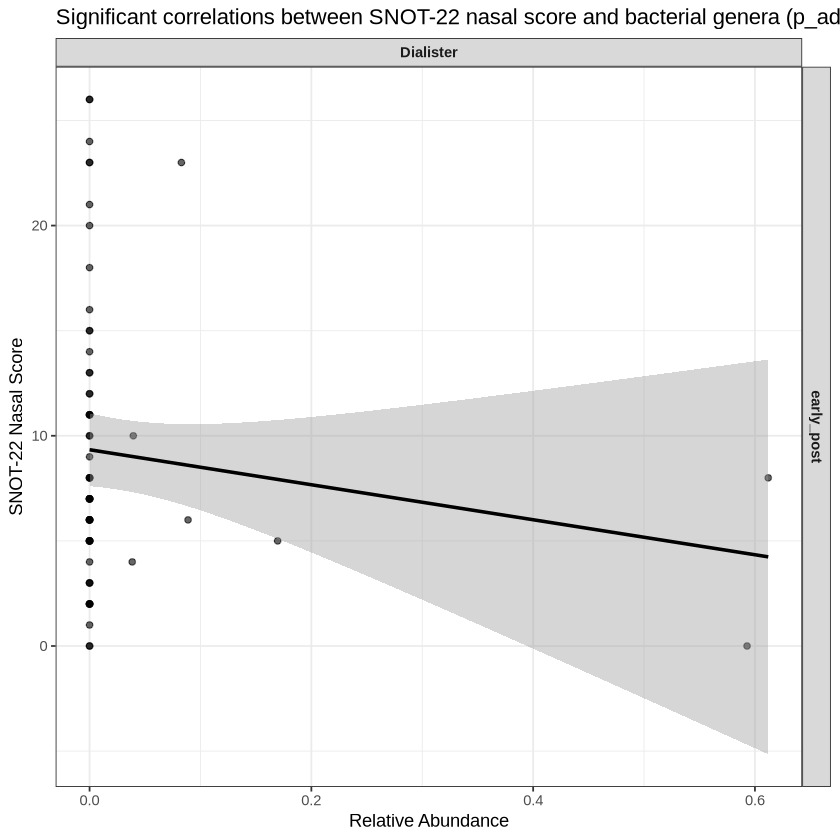

In [41]:
# 1) Combine correlation results into one tibble with SurgeryGroup
by_group_corr_df <- bind_rows(by_group_corr, .id = "SurgeryGroup")

# 2) Get significant genus-group pairs (p_adj < 0.05)
sig_genera_group <- by_group_corr_df %>%
  filter(p_adj < 0.05)

# 3) Build dataframe for plotting (use SNOT22nasal this time)
plot_df_group <- merged_df %>%
  select(ID_Sample, SNOT22nasal, SurgeryGroup, all_of(unique(sig_genera_group$Genus))) %>%
  pivot_longer(
    cols = -c(ID_Sample, SNOT22nasal, SurgeryGroup),
    names_to = "Genus",
    values_to = "RelAbundance"
  ) %>%
  inner_join(sig_genera_group %>% select(Genus, SurgeryGroup, rho, p_adj),
             by = c("Genus", "SurgeryGroup"))

# 4) Scatter + lm fit, faceted by Genus and SurgeryGroup
ggplot(plot_df_group, aes(x = RelAbundance, y = SNOT22nasal)) +
  geom_point(alpha = 0.6, color = "black") +
  geom_smooth(method = "lm", se = TRUE, color = "black") +
  facet_grid(SurgeryGroup ~ Genus, scales = "free_x") +
  labs(x = "Relative Abundance",
       y = "SNOT-22 Nasal Score",
       title = "Significant correlations between SNOT-22 nasal score and bacterial genera (p_adj < 0.05)") +
  theme_bw() +
  theme(strip.text = element_text(face = "bold"),
        legend.position = "none")

`geom_smooth()` using formula = 'y ~ x'


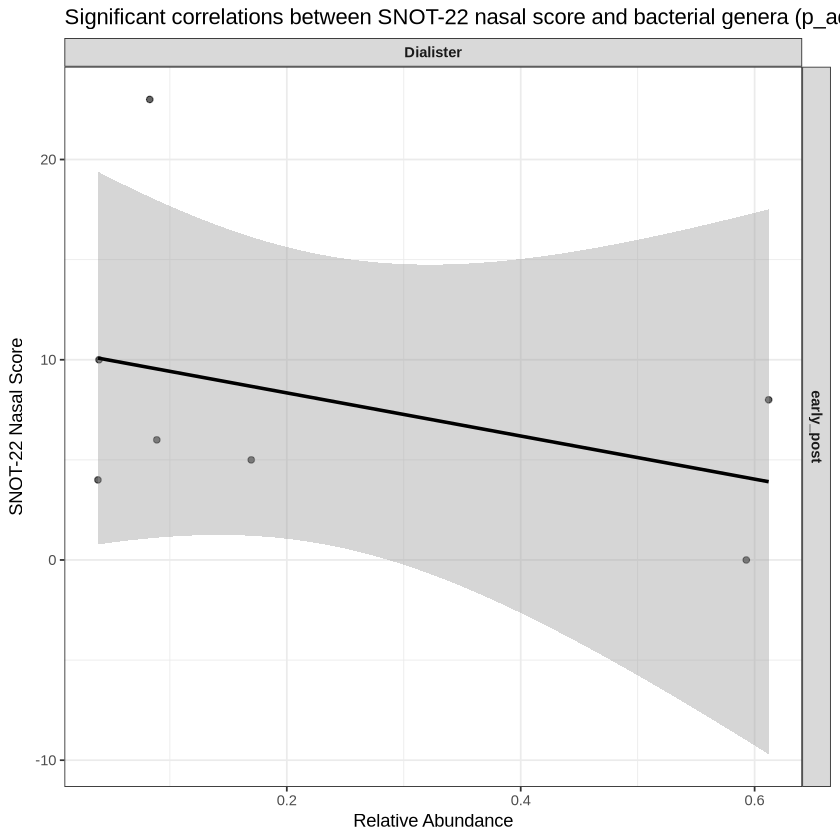

In [45]:
p2 <- ggplot(plot_df_group, aes(x = RelAbundance, y = SNOT22nasal)) +
  # only plot points if RelAbundance > 0
  geom_point(data = subset(plot_df_group, RelAbundance > 0),
             alpha = 0.6, color = "black") +
  # smoothing still uses the full dataset
  geom_smooth(method = "lm", se = TRUE, color = "black") +
  facet_grid(SurgeryGroup ~ Genus, scales = "free_x") +
  labs(x = "Relative Abundance",
       y = "SNOT-22 Nasal Score",
       title = "Significant correlations between SNOT-22 nasal score and bacterial genera (p_adj < 0.05)") +
  theme_bw() +
  theme(strip.text = element_text(face = "bold"),
        legend.position = "none")

p2

In [51]:
# ---------- Correlation: microbes x LK_Total

# print(head(abund_df_all))

# colnames(metadata_filtered)

##  Merge with metadata 
merged_df <- abund_df_all %>%
  left_join(metadata_filtered %>% select(ID_Sample, SNOT22_cat, LK_Total), by = "ID_Sample") %>%
  filter(!is.na(SNOT22_cat))

# Map samples to timepoints or surgery groups
time_group_map <- c(
  "T0" = "pre_surgery",
  "T1" = "early_post",
  "T3" = "early_post",
  "T6" = "late_post",
  "T12" = "late_post"
)

get_time_group <- function(id_sample) {
  tp <- str_extract(id_sample, "T[0-9]+")
  time_group_map[tp]
}

# Add surgery/time groups
merged_df$SurgeryGroup <- sapply(merged_df$ID_Sample, get_time_group)

# 4) Extract genus abundance matrix
genus_data <- merged_df %>% select(-ID_Sample, -SNOT22_cat, -SurgeryGroup, -LK_Total)

# Replace NA with 0
genus_data <- genus_data %>% mutate(across(everything(), ~ ifelse(is.na(.), 0, .)))
print(head(genus_data))
print(head(merged_df))

# ---- Function to compute Spearman correlation for each genus ----
compute_spearman <- function(df) {
  genus_cols <- setdiff(colnames(df), c("ID_Sample", "SNOT22_cat", "SurgeryGroup", "LK_Total"))
  
  results <- lapply(genus_cols, function(genus) {
    x <- df[[genus]]
    y <- df$LK_Total
    
    # Skip if not enough unique values
    if (length(unique(x[!is.na(x)])) < 2 | length(unique(y[!is.na(y)])) < 2) {
      return(NULL)
    }
    
    cor_test <- suppressWarnings(cor.test(x, y, method = "spearman"))
    
    data.frame(
      Genus = genus,
      rho = cor_test$estimate,
      p_value = cor_test$p.value
    )
  })
  
  # Combine results and adjust p-values
  results_df <- bind_rows(results) %>%
    mutate(p_adj = p.adjust(p_value, method = "bonferroni")) %>%
    arrange(p_value)
  
  return(results_df)
}

overall_corr <- compute_spearman(merged_df)

by_group_corr <- merged_df %>%
  group_split(SurgeryGroup) %>%
  setNames(unique(merged_df$SurgeryGroup)) %>%
  lapply(compute_spearman)

head(overall_corr)
lapply(by_group_corr, head)

  Anaerococcus Corynebacterium Cutibacterium Dolosigranulum Finegoldia
1    0.6011422       5.6807935     0.1502855    14.93838293 0.81154193
2   11.0485269       0.5199307     5.8925477     6.15251300 5.63258232
3   10.6796117       0.8252427     1.1650485     0.04854369 5.82524272
4    0.7651841       0.0000000     0.1912960     0.11956002 0.07173601
5    0.7183908      25.6465517     0.8620690     2.51436782 0.14367816
6    0.3693592       1.1883732     0.1927092    91.77774209 0.06423639
  Haemophilus Incertae Sedis Peptoniphilus Porphyromonas Pseudomonas
1   0.1803427      1.1722272     0.7213706    0.12022843  0.06011422
2   2.7296360      0.4766031    21.4904679    0.04332756  3.46620451
3   1.7961165      1.2621359    10.7766990    0.00000000 14.70873786
4   0.0000000      0.1195600     0.2869440    0.00000000  0.52606408
5   0.0000000      0.1436782     0.4310345    0.00000000  5.45977011
6   0.0160591      0.1124137     0.2408865    0.00000000  0.00000000
  Staphylococcus Str

,Genus,rho,p_value,p_adj
,<chr>,<dbl>,<dbl>,<dbl>
rho...1,Peptoniphilus,-0.1381553,0.0951657,1
rho...2,Anaerococcus,-0.1336137,0.1066592,1
rho...3,Aggregatibacter,0.1482709,0.1121902,1
rho...4,Proteus,-0.1314972,0.1123746,1
rho...5,Burkholderia-Caballeronia-Paraburkholderia,0.1453653,0.1227869,1
rho...6,Dialister,0.1259850,0.1283822,1


,Genus,rho,p_value,p_adj
,<chr>,<dbl>,<dbl>,<dbl>
rho...1,Peptoniphilus,-0.4627427,0.0001181336,0.004016543
rho...2,Anaerococcus,-0.3888211,0.0014973006,0.050908221
rho...3,Dolosigranulum,-0.3677170,0.0027966508,0.095086128
rho...4,Finegoldia,-0.2916514,0.0193711379,0.658618689
rho...5,Parvimonas,-0.2909085,0.0196963421,0.669675631
rho...6,Corynebacterium,-0.2431551,0.0528594350,1.000000000
,Genus,rho,p_value,p_adj
,<chr>,<dbl>,<dbl>,<dbl>
rho...1,Corynebacterium,-0.5232148,0.0001908239,0.006297188


`geom_smooth()` using formula = 'y ~ x'


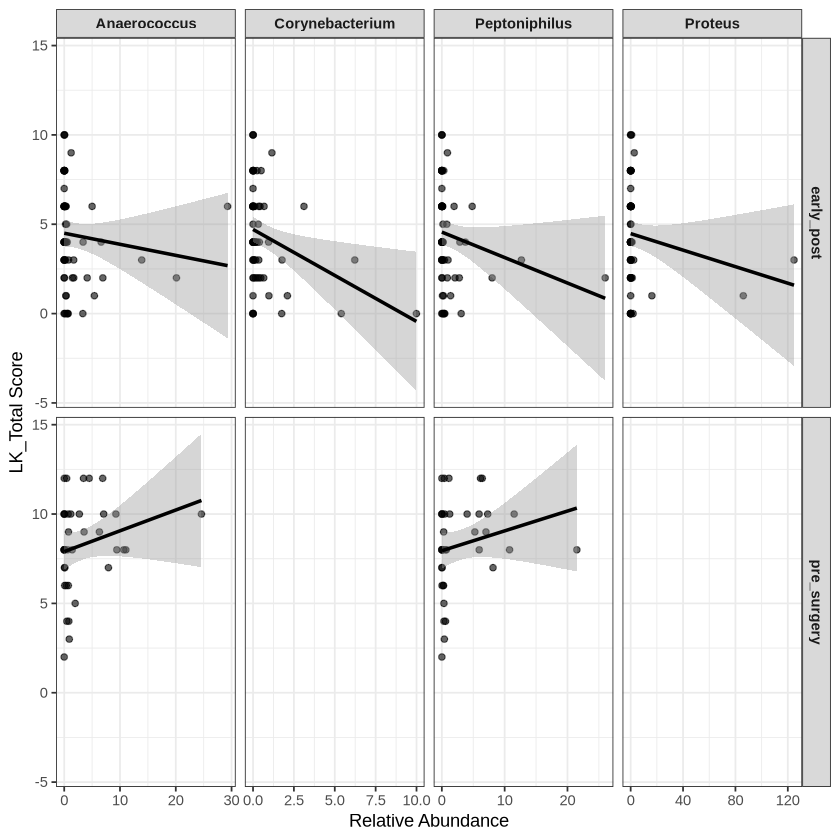

In [52]:
# 1) Combine correlation results into one tibble with SurgeryGroup
by_group_corr_df <- bind_rows(by_group_corr, .id = "SurgeryGroup")

# 2) Keep only significant genera in pre_surgery or early_post
sig_genera_group <- by_group_corr_df %>%
  filter(p_adj < 0.06, SurgeryGroup %in% c("pre_surgery", "early_post"))

# 3) Build dataframe for plotting
plot_df_group <- merged_df %>%
  select(ID_Sample, LK_Total, SurgeryGroup, all_of(unique(sig_genera_group$Genus))) %>%
  pivot_longer(
    cols = -c(ID_Sample, LK_Total, SurgeryGroup),
    names_to = "Genus",
    values_to = "RelAbundance"
  ) %>%
  inner_join(sig_genera_group %>% select(Genus, SurgeryGroup, rho, p_adj),
             by = c("Genus", "SurgeryGroup"))

# 4) Scatter + lm fit, faceted by Genus and SurgeryGroup
ggplot(plot_df_group, aes(x = RelAbundance, y = LK_Total)) +
  geom_point(alpha = 0.6, color = "black") +
  geom_smooth(method = "lm", se = TRUE, color = "black") +
  facet_grid(SurgeryGroup ~ Genus, scales = "free_x") +
  labs(x = "Relative Abundance",
       y = "LK_Total Score") +
  theme_bw() +
  theme(strip.text = element_text(face = "bold"),
        legend.position = "none")

In [54]:
# ---------- Correlation: microbes x LK_Secret

# print(head(abund_df_all))

# colnames(metadata_filtered)

##  Merge with metadata 
merged_df <- abund_df_all %>%
  left_join(metadata_filtered %>% select(ID_Sample, SNOT22_cat, LK_Secret), by = "ID_Sample") %>%
  filter(!is.na(SNOT22_cat))

# Map samples to timepoints or surgery groups
time_group_map <- c(
  "T0" = "pre_surgery",
  "T1" = "early_post",
  "T3" = "early_post",
  "T6" = "late_post",
  "T12" = "late_post"
)

get_time_group <- function(id_sample) {
  tp <- str_extract(id_sample, "T[0-9]+")
  time_group_map[tp]
}

# Add surgery/time groups
merged_df$SurgeryGroup <- sapply(merged_df$ID_Sample, get_time_group)

# 4) Extract genus abundance matrix
genus_data <- merged_df %>% select(-ID_Sample, -SNOT22_cat, -SurgeryGroup, -LK_Secret)

# Replace NA with 0
genus_data <- genus_data %>% mutate(across(everything(), ~ ifelse(is.na(.), 0, .)))
print(head(genus_data))
print(head(merged_df))

# ---- Function to compute Spearman correlation for each genus ----
compute_spearman <- function(df) {
  genus_cols <- setdiff(colnames(df), c("ID_Sample", "SNOT22_cat", "SurgeryGroup", "LK_Secret"))
  
  results <- lapply(genus_cols, function(genus) {
    x <- df[[genus]]
    y <- df$LK_Secret
    
    # Skip if not enough unique values
    if (length(unique(x[!is.na(x)])) < 2 | length(unique(y[!is.na(y)])) < 2) {
      return(NULL)
    }
    
    cor_test <- suppressWarnings(cor.test(x, y, method = "spearman"))
    
    data.frame(
      Genus = genus,
      rho = cor_test$estimate,
      p_value = cor_test$p.value
    )
  })
  
  # Combine results and adjust p-values
  results_df <- bind_rows(results) %>%
    mutate(p_adj = p.adjust(p_value, method = "bonferroni")) %>%
    arrange(p_value)
  
  return(results_df)
}

overall_corr <- compute_spearman(merged_df)

by_group_corr <- merged_df %>%
  group_split(SurgeryGroup) %>%
  setNames(unique(merged_df$SurgeryGroup)) %>%
  lapply(compute_spearman)

head(overall_corr)
lapply(by_group_corr, head)

  Anaerococcus Corynebacterium Cutibacterium Dolosigranulum Finegoldia
1    0.6011422       5.6807935     0.1502855    14.93838293 0.81154193
2   11.0485269       0.5199307     5.8925477     6.15251300 5.63258232
3   10.6796117       0.8252427     1.1650485     0.04854369 5.82524272
4    0.7651841       0.0000000     0.1912960     0.11956002 0.07173601
5    0.7183908      25.6465517     0.8620690     2.51436782 0.14367816
6    0.3693592       1.1883732     0.1927092    91.77774209 0.06423639
  Haemophilus Incertae Sedis Peptoniphilus Porphyromonas Pseudomonas
1   0.1803427      1.1722272     0.7213706    0.12022843  0.06011422
2   2.7296360      0.4766031    21.4904679    0.04332756  3.46620451
3   1.7961165      1.2621359    10.7766990    0.00000000 14.70873786
4   0.0000000      0.1195600     0.2869440    0.00000000  0.52606408
5   0.0000000      0.1436782     0.4310345    0.00000000  5.45977011
6   0.0160591      0.1124137     0.2408865    0.00000000  0.00000000
  Staphylococcus Str

,Genus,rho,p_value,p_adj
,<chr>,<dbl>,<dbl>,<dbl>
rho...1,Corynebacterium,-0.2635896,0.001256140,0.04270877
rho...2,Cutibacterium,-0.2593973,0.001510471,0.05135601
rho...3,Peptoniphilus,-0.2568280,0.001688693,0.05741556
rho...4,Anaerococcus,-0.2503147,0.002229473,0.07580209
rho...5,Dolosigranulum,-0.2298848,0.005094043,0.17319746
rho...6,Proteus,-0.1728339,0.036314224,1.00000000


,Genus,rho,p_value,p_adj
,<chr>,<dbl>,<dbl>,<dbl>
rho...1,Peptoniphilus,-0.4096051,0.0007765318,0.02640208
rho...2,Dolosigranulum,-0.3925177,0.0013363593,0.04543622
rho...3,Anaerococcus,-0.3246937,0.0088526473,0.30099001
rho...4,Corynebacterium,-0.2974842,0.0169731305,0.57708644
rho...5,Cutibacterium,-0.2555437,0.0415468286,1.00000000
rho...6,Finegoldia,-0.2392208,0.0569374652,1.00000000
,Genus,rho,p_value,p_adj
,<chr>,<dbl>,<dbl>,<dbl>
rho...1,Cutibacterium,-0.5033498,0.0003629406,0.01197704


`geom_smooth()` using formula = 'y ~ x'


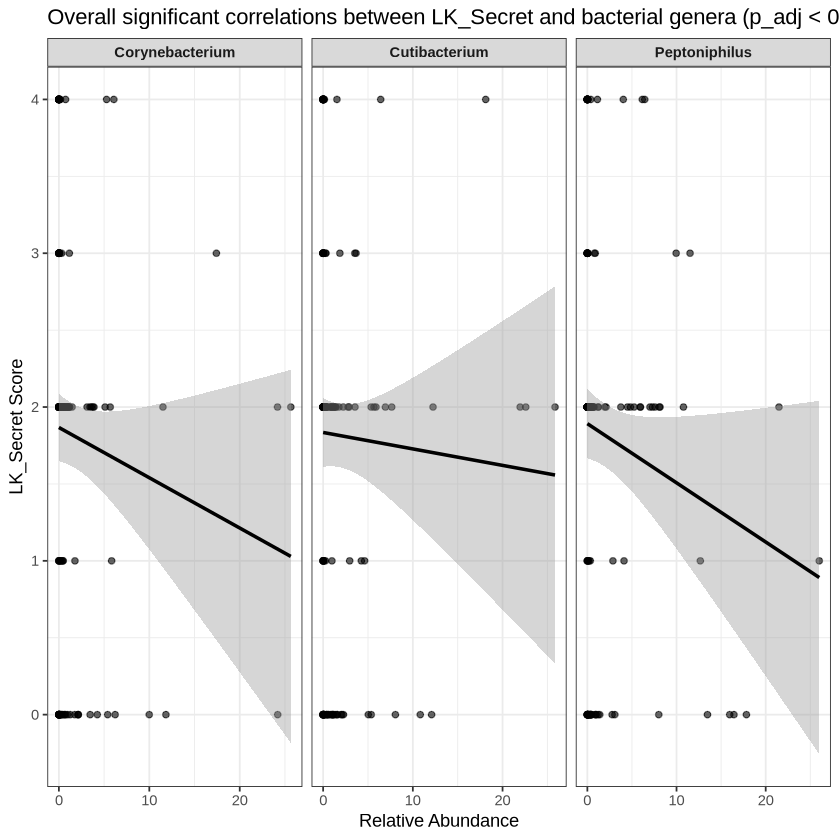

In [55]:
# Plot for overall_corr (all samples combined)
# Get significant genera overall
sig_genera_overall <- overall_corr %>%
  filter(p_adj < 0.06)

# Build dataframe for plotting
plot_df_overall <- merged_df %>%
  select(ID_Sample, LK_Secret, all_of(sig_genera_overall$Genus)) %>%
  pivot_longer(
    cols = -c(ID_Sample, LK_Secret),
    names_to = "Genus",
    values_to = "RelAbundance"
  ) %>%
  inner_join(sig_genera_overall %>% select(Genus, rho, p_adj), by = "Genus")

# Scatter + lm fit, faceted by Genus
ggplot(plot_df_overall, aes(x = RelAbundance, y = LK_Secret)) +
  geom_point(alpha = 0.6, color = "black") +
  geom_smooth(method = "lm", se = TRUE, color = "black") +
  facet_wrap(~ Genus, scales = "free_x") +
  labs(x = "Relative Abundance",
       y = "LK_Secret Score",
       title = "Overall significant correlations between LK_Secret and bacterial genera (p_adj < 0.05)") +
  theme_bw() +
  theme(strip.text = element_text(face = "bold"),
        legend.position = "none")

`geom_smooth()` using formula = 'y ~ x'


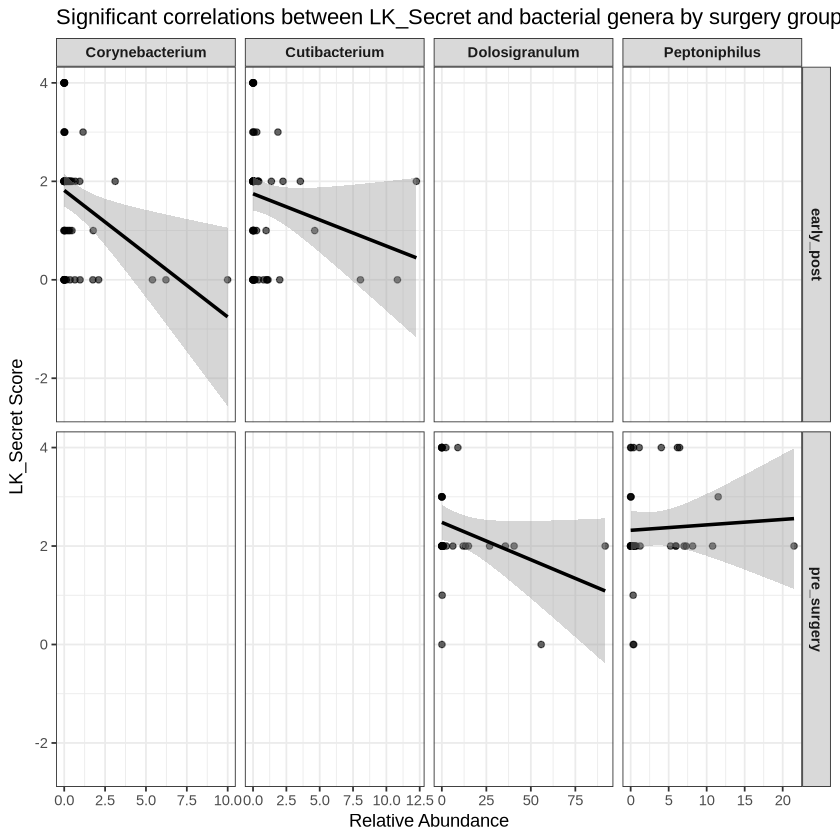

In [56]:
# Plot for by_group_corr (per SurgeryGroup)
# Combine correlation results into one tibble with SurgeryGroup
by_group_corr_df <- bind_rows(by_group_corr, .id = "SurgeryGroup")

# Get significant genus-group pairs
sig_genera_group <- by_group_corr_df %>%
  filter(p_adj < 0.06)

# Build dataframe for plotting
plot_df_group <- merged_df %>%
  select(ID_Sample, LK_Secret, SurgeryGroup, all_of(unique(sig_genera_group$Genus))) %>%
  pivot_longer(
    cols = -c(ID_Sample, LK_Secret, SurgeryGroup),
    names_to = "Genus",
    values_to = "RelAbundance"
  ) %>%
  inner_join(sig_genera_group %>% select(Genus, SurgeryGroup, rho, p_adj),
             by = c("Genus", "SurgeryGroup"))

# Scatter + lm fit, faceted by Genus and SurgeryGroup
ggplot(plot_df_group, aes(x = RelAbundance, y = LK_Secret)) +
  geom_point(alpha = 0.6, color = "black") +
  geom_smooth(method = "lm", se = TRUE, color = "black") +
  facet_grid(SurgeryGroup ~ Genus, scales = "free_x") +
  labs(x = "Relative Abundance",
       y = "LK_Secret Score",
       title = "Significant correlations between LK_Secret and bacterial genera by surgery group (p_adj < 0.05)") +
  theme_bw() +
  theme(strip.text = element_text(face = "bold"),
        legend.position = "none")


In [57]:
# ---------- Correlation: microbes x Final_LundMackay

# print(head(abund_df_all))

# colnames(metadata_filtered)

##  Merge with metadata 
merged_df <- abund_df_all %>%
  left_join(metadata_filtered %>% select(ID_Sample, SNOT22_cat, Final_LundMackay), by = "ID_Sample") %>%
  filter(!is.na(SNOT22_cat))

# Map samples to timepoints or surgery groups
time_group_map <- c(
  "T0" = "pre_surgery",
  "T1" = "early_post",
  "T3" = "early_post",
  "T6" = "late_post",
  "T12" = "late_post"
)

get_time_group <- function(id_sample) {
  tp <- str_extract(id_sample, "T[0-9]+")
  time_group_map[tp]
}

# Add surgery/time groups
merged_df$SurgeryGroup <- sapply(merged_df$ID_Sample, get_time_group)

# 4) Extract genus abundance matrix
genus_data <- merged_df %>% select(-ID_Sample, -SNOT22_cat, -SurgeryGroup, -Final_LundMackay)

# Replace NA with 0
genus_data <- genus_data %>% mutate(across(everything(), ~ ifelse(is.na(.), 0, .)))
print(head(genus_data))
print(head(merged_df))

# ---- Function to compute Spearman correlation for each genus ----
compute_spearman <- function(df) {
  genus_cols <- setdiff(colnames(df), c("ID_Sample", "SNOT22_cat", "SurgeryGroup", "Final_LundMackay"))
  
  results <- lapply(genus_cols, function(genus) {
    x <- df[[genus]]
    y <- df$Final_LundMackay
    
    # Skip if not enough unique values
    if (length(unique(x[!is.na(x)])) < 2 | length(unique(y[!is.na(y)])) < 2) {
      return(NULL)
    }
    
    cor_test <- suppressWarnings(cor.test(x, y, method = "spearman"))
    
    data.frame(
      Genus = genus,
      rho = cor_test$estimate,
      p_value = cor_test$p.value
    )
  })
  
  # Combine results and adjust p-values
  results_df <- bind_rows(results) %>%
    mutate(p_adj = p.adjust(p_value, method = "bonferroni")) %>%
    arrange(p_value)
  
  return(results_df)
}

overall_corr <- compute_spearman(merged_df)

by_group_corr <- merged_df %>%
  group_split(SurgeryGroup) %>%
  setNames(unique(merged_df$SurgeryGroup)) %>%
  lapply(compute_spearman)

head(overall_corr)
lapply(by_group_corr, head)

  Anaerococcus Corynebacterium Cutibacterium Dolosigranulum Finegoldia
1    0.6011422       5.6807935     0.1502855    14.93838293 0.81154193
2   11.0485269       0.5199307     5.8925477     6.15251300 5.63258232
3   10.6796117       0.8252427     1.1650485     0.04854369 5.82524272
4    0.7651841       0.0000000     0.1912960     0.11956002 0.07173601
5    0.7183908      25.6465517     0.8620690     2.51436782 0.14367816
6    0.3693592       1.1883732     0.1927092    91.77774209 0.06423639
  Haemophilus Incertae Sedis Peptoniphilus Porphyromonas Pseudomonas
1   0.1803427      1.1722272     0.7213706    0.12022843  0.06011422
2   2.7296360      0.4766031    21.4904679    0.04332756  3.46620451
3   1.7961165      1.2621359    10.7766990    0.00000000 14.70873786
4   0.0000000      0.1195600     0.2869440    0.00000000  0.52606408
5   0.0000000      0.1436782     0.4310345    0.00000000  5.45977011
6   0.0160591      0.1124137     0.2408865    0.00000000  0.00000000
  Staphylococcus Str

,Genus,rho,p_value,p_adj
,<chr>,<dbl>,<dbl>,<dbl>
rho...1,Staphylococcus,-0.1839884,0.02569591,0.8736608
rho...2,Cutibacterium,-0.1834305,0.02615547,0.8892860
rho...3,Incertae Sedis,0.1723469,0.03685171,1.0000000
rho...4,Porphyromonas,0.1444557,0.10515755,1.0000000
rho...5,Finegoldia,-0.1155738,0.16332632,1.0000000
rho...6,Peptoniphilus,-0.1066770,0.19843563,1.0000000


,Genus,rho,p_value,p_adj
,<chr>,<dbl>,<dbl>,<dbl>
rho...1,Dolosigranulum,-0.2266993,0.07164269,1
rho...2,Finegoldia,-0.2263602,0.07207954,1
rho...3,Peptoniphilus,-0.2237454,0.07552030,1
rho...4,Cutibacterium,-0.1952152,0.12213948,1
rho...5,Streptococcus,-0.1845689,0.14428289,1
rho...6,Porphyromonas,0.1800523,0.15453518,1
,Genus,rho,p_value,p_adj
,<chr>,<dbl>,<dbl>,<dbl>
rho...1,Mycoplasmoides,0.3242754,0.1060544,1
